<a href="https://colab.research.google.com/github/ravi-gopalan/ipl_analysis/blob/master/ipl_analysis_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls -la

total 16
drwxr-xr-x 1 root root 4096 May 31 16:17 .
drwxr-xr-x 1 root root 4096 Jun 18 00:43 ..
drwxr-xr-x 1 root root 4096 Jun 14 16:05 .config
drwxr-xr-x 1 root root 4096 May 31 16:17 sample_data


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
cd /content

/content


In [0]:
!mkdir ipl

In [5]:
cd /content/ipl

/content/ipl


In [6]:
cd /root

/root


In [0]:
!mkdir .kaggle

In [0]:
!cp '/content/gdrive/My Drive/Colab_stuff/kaggle.json' /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
cd /content/ipl

/content/ipl


In [10]:
!kaggle datasets download -d ravijee/ipl-2008-to-2019 -p /content/ipl

100% 4.07M/4.07M [00:00<00:00, 19.6MB/s]



In [11]:
!ls -la

total 4180
drwxr-xr-x 2 root root    4096 Jun 18 00:49 .
drwxr-xr-x 1 root root    4096 Jun 18 00:49 ..
-rw-r--r-- 1 root root 4268495 Jun 18 00:49 ipl-2008-to-2019.zip


In [12]:
pwd

'/content/ipl'

In [0]:
!unzip -q /content/ipl/ipl-2008-to-2019.zip

In [14]:
!ls -la

total 60900
drwxr-xr-x 2 root root     4096 Jun 18 00:50 .
drwxr-xr-x 1 root root     4096 Jun 18 00:49 ..
---------- 1 root root 55848188 Jun 18 00:41 ball_by_ball_details.csv
-rw-r--r-- 1 root root  4268495 Jun 18 00:49 ipl-2008-to-2019.zip
---------- 1 root root   166458 Jun 18 00:41 ipl_summary.csv
---------- 1 root root  2060580 Jun 18 00:41 ipl.zip


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

import datetime as dt

In [0]:
base_dir = Path('/content/ipl')

In [0]:
df_match_summary = pd.read_csv('ipl_summary.csv')

In [18]:
df_match_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 21 columns):
match_id              756 non-null int64
city                  743 non-null object
competition           756 non-null object
decision              756 non-null object
eliminator            9 non-null object
gender                756 non-null object
match_type            756 non-null object
method                19 non-null object
neutral_venue         77 non-null float64
#_of_overs            756 non-null int64
player_of_match       752 non-null object
result                13 non-null object
teams                 756 non-null object
umpires               755 non-null object
venue                 756 non-null object
winner                756 non-null object
winner_toss           743 non-null object
outcome_by_runs       337 non-null float64
outcome_by_wickets    406 non-null float64
match_date            756 non-null object
season                756 non-null int64
dtypes: float64(3)

In [0]:
df_match_summary = df_match_summary.set_index('match_id')

In [20]:
df_match_summary.head()

,city,competition,decision,eliminator,gender,match_type,method,neutral_venue,#_of_overs,player_of_match,result,teams,umpires,venue,winner,winner_toss,outcome_by_runs,outcome_by_wickets,match_date,season
match_id,,,,,,,,,,,,,,,,,,,,
548314,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,['RG Sharma'],NaN,"['Deccan Chargers', 'Mumbai Indians']","['AK Chaudhary', 'JD Cloete']",Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Mumbai Indians,Deccan Chargers,NaN,5.0,2012-04-09,2012
1178429,Bengaluru,IPL,field,NaN,male,T20,NaN,NaN,20,['SO Hetmyer'],NaN,"['Royal Challengers Bangalore', 'Sunrisers Hyd...","['NJ Llong', 'AK Chaudhary']",M.Chinnaswamy Stadium,Royal Challengers Bangalore,Royal Challengers Bangalore,NaN,4.0,2019-05-04,2019
419157,Bangalore,IPL,field,NaN,male,T20,NaN,NaN,20,['R McLaren'],NaN,"['Royal Challengers Bangalore', 'Mumbai Indians']","['HDPK Dharmasena', 'SJA Taufel']",M Chinnaswamy Stadium,Mumbai Indians,Royal Challengers Bangalore,57.0,NaN,2010-04-17,2010
548375,Pune,IPL,bat,NaN,male,T20,NaN,NaN,20,['Shakib Al Hasan'],NaN,"['Pune Warriors', 'Kolkata Knight Riders']","['S Asnani', 'BR Doctrove']",Subrata Roy Sahara Stadium,Kolkata Knight Riders,Kolkata Knight Riders,34.0,NaN,2012-05-19,2012
392234,Durban,IPL,bat,NaN,male,T20,NaN,1.0,20,['M Muralitharan'],NaN,"['Chennai Super Kings', 'Kings XI Punjab']","['BG Jerling', 'SJA Taufel']",Kingsmead,Chennai Super Kings,Chennai Super Kings,24.0,NaN,2009-05-20,2009


In [0]:
df_match_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 419128 to 829785
Data columns (total 21 columns):
by                 743 non-null object
city               743 non-null object
competition        756 non-null object
dates              756 non-null object
decision           756 non-null object
eliminator         9 non-null object
gender             756 non-null object
match_type         756 non-null object
method             19 non-null object
neutral_venue      77 non-null float64
overs              756 non-null int64
player_of_match    752 non-null object
result             13 non-null object
teams              756 non-null object
umpires            755 non-null object
venue              756 non-null object
winner             756 non-null object
winner_toss        743 non-null object
runs               337 non-null float64
wickets            406 non-null float64
match_date         756 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(16)
mem

In [0]:
df_match_summary['player_of_match'] = df_match_summary['player_of_match'].str[2:-2]
df_match_summary.rename(columns={'decision':'toss_decision'}, inplace=True)

In [22]:
df_teams = pd.DataFrame(df_match_summary.teams.str.split(',',n=2,expand=True))
df_teams.rename(columns={0:'team_1',1:'team_2'},inplace=True)
df_teams.team_1 = df_teams.team_1.str[2:-1] 
df_teams.team_2 = df_teams.team_2.str[2:-2] 
df_teams.head()

,team_1,team_2
match_id,,
548314,Deccan Chargers,Mumbai Indians
1178429,Royal Challengers Bangalore,Sunrisers Hyderabad
419157,Royal Challengers Bangalore,Mumbai Indians
548375,Pune Warriors,Kolkata Knight Riders
392234,Chennai Super Kings,Kings XI Punjab


In [23]:
df_umpires = pd.DataFrame(df_match_summary.umpires.str.split(',',n=4,expand=True))
df_umpires.rename(columns={0:'umpire_1',1:'umpire_2',2:'umpire_3',3:'umpire_4'},inplace=True)
df_umpires.umpire_1 = df_umpires.umpire_1.str[2:-1] 
df_umpires.umpire_2 = df_umpires.umpire_2.str[2:-2]
df_umpires.umpire_3 = df_umpires.umpire_3.str[2:-2]
df_umpires.umpire_4 = df_umpires.umpire_4.str[2:-2]

df_umpires.head()

,umpire_1,umpire_2,umpire_3,umpire_4
match_id,,,,
548314,AK Chaudhary,JD Cloete,None,None
1178429,NJ Llong,AK Chaudhary,None,None
419157,HDPK Dharmasena,SJA Taufel,None,None
548375,S Asnani,BR Doctrove,None,None
392234,BG Jerling,SJA Taufel,None,None


In [0]:
df_match_summary = df_match_summary.join(df_teams) 
df_match_summary = df_match_summary.join(df_umpires) 
df_match_summary.drop(['teams','umpires'], axis=1, inplace=True)

Map team names to abbreviations and standardize names

In [0]:
team_names = {'Rajasthan Royals':'RR',\
              'Mumbai Indians' : 'MI',\
              'Delhi Daredevils':'DD',\
              'Kolkata Knight Riders':'KKR',\
              'Kings XI Punjab':'KXP',\
              'Sunrisers Hyderabad':'SRH',\
              'Deccan Chargers':'DC-Chargers',\
              'Chennai Super Kings':'CSK',\
              'Rising Pune Supergiants':'RPS',\
              'Royal Challengers Bangalore':'RCB',\
              'Pune Warriors':'PW',\
              'Gujarat Lions':'GL',\
              'Delhi Capitals':'DC-Capitals',\
              'Rising Pune Supergiant':'RPS',\
              'Kochi Tuskers Kerala':'KTK'
             }

In [0]:
df_match_summary['winner_toss'] = df_match_summary['winner_toss'].map(team_names)

In [0]:
df_match_summary['winner'] = df_match_summary['winner'].map(team_names)
df_match_summary['team_1'] = df_match_summary['team_1'].map(team_names)
df_match_summary['team_2'] = df_match_summary['team_2'].map(team_names)

In [28]:
df_match_summary.head()

,city,competition,toss_decision,eliminator,gender,match_type,method,neutral_venue,#_of_overs,player_of_match,result,venue,winner,winner_toss,outcome_by_runs,outcome_by_wickets,match_date,season,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4
match_id,,,,,,,,,,,,,,,,,,,,,,,,
548314,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
1178429,Bengaluru,IPL,field,NaN,male,T20,NaN,NaN,20,SO Hetmyer,NaN,M.Chinnaswamy Stadium,RCB,RCB,NaN,4.0,2019-05-04,2019,RCB,SRH,NJ Llong,AK Chaudhary,None,None
419157,Bangalore,IPL,field,NaN,male,T20,NaN,NaN,20,R McLaren,NaN,M Chinnaswamy Stadium,MI,RCB,57.0,NaN,2010-04-17,2010,RCB,MI,HDPK Dharmasena,SJA Taufel,None,None
548375,Pune,IPL,bat,NaN,male,T20,NaN,NaN,20,Shakib Al Hasan,NaN,Subrata Roy Sahara Stadium,KKR,KKR,34.0,NaN,2012-05-19,2012,PW,KKR,S Asnani,BR Doctrove,None,None
392234,Durban,IPL,bat,NaN,male,T20,NaN,1.0,20,M Muralitharan,NaN,Kingsmead,CSK,CSK,24.0,NaN,2009-05-20,2009,CSK,KXP,BG Jerling,SJA Taufel,None,None


In [0]:
df_match_summary.to_csv('match_summary.csv')

In [30]:
df_details = pd.read_csv('ball_by_ball_details.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (23,26,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 41 columns):
Unnamed: 0            178949 non-null int64
batsman               178940 non-null object
batsman_runs          178940 non-null float64
batting_team          178949 non-null object
bowler                178940 non-null object
byes                  480 non-null float64
extras_runs           178299 non-null float64
fielders              6338 non-null object
kind                  8827 non-null object
legbyes               2933 non-null float64
inning                178949 non-null object
delivery              178949 non-null float64
match_id              178949 non-null int64
noballs               712 non-null float64
non_striker           178940 non-null object
player_out            8827 non-null object
total                 178940 non-null float64
wides                 5405 non-null float64
non_boundary          14 non-null float64
penalty               2 non-null float64
city  

In [32]:
df_details['batting_team'] = df_details['batting_team'].map(team_names)
df_details = df_details.drop(columns=['competition','decision','eliminator','gender','match_type','neutral_venue',\
                                      '#_of_overs','player_of_match','city','result','teams','umpires','winner','winner_toss','outcome_by_runs',\
                                      'outcome_by_wickets','match_date','season','venue'])
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 22 columns):
Unnamed: 0      178949 non-null int64
batsman         178940 non-null object
batsman_runs    178940 non-null float64
batting_team    178949 non-null object
bowler          178940 non-null object
byes            480 non-null float64
extras_runs     178299 non-null float64
fielders        6338 non-null object
kind            8827 non-null object
legbyes         2933 non-null float64
inning          178949 non-null object
delivery        178949 non-null float64
match_id        178949 non-null int64
noballs         712 non-null float64
non_striker     178940 non-null object
player_out      8827 non-null object
total           178940 non-null float64
wides           5405 non-null float64
non_boundary    14 non-null float64
penalty         2 non-null float64
method          3208 non-null object
over            178949 non-null int64
dtypes: float64(10), int64(3), object(9)
memory usa

In [33]:
df_details.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 21 columns):
batsman         178940 non-null object
batsman_runs    178940 non-null float64
batting_team    178949 non-null object
bowler          178940 non-null object
byes            480 non-null float64
extras_runs     178299 non-null float64
fielders        6338 non-null object
kind            8827 non-null object
legbyes         2933 non-null float64
inning          178949 non-null object
delivery        178949 non-null float64
match_id        178949 non-null int64
noballs         712 non-null float64
non_striker     178940 non-null object
player_out      8827 non-null object
total           178940 non-null float64
wides           5405 non-null float64
non_boundary    14 non-null float64
penalty         2 non-null float64
method          3208 non-null object
over            178949 non-null int64
dtypes: float64(10), int64(2), object(9)
memory usage: 28.7+ MB


In [34]:
df_details.head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,fielders,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over
0,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,NaN,inning_1,0.1,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,NaN,1
1,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,NaN,inning_1,0.2,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,NaN,1
2,PA Patel,1.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,NaN,inning_1,0.3,548314,NaN,S Dhawan,NaN,1.0,NaN,NaN,NaN,NaN,1
3,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,NaN,inning_1,0.4,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,NaN,1
4,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,NaN,inning_1,0.5,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,NaN,1


In [0]:
df_details['wides'] = df_details['wides'].astype('float')
df_details['noballs'] = df_details['noballs'].astype('float')
df_details['legbyes'] = df_details['legbyes'].astype('float')
df_details['byes'] = df_details['byes'].astype('float')


In [36]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 21 columns):
batsman         178940 non-null object
batsman_runs    178940 non-null float64
batting_team    178949 non-null object
bowler          178940 non-null object
byes            480 non-null float64
extras_runs     178299 non-null float64
fielders        6338 non-null object
kind            8827 non-null object
legbyes         2933 non-null float64
inning          178949 non-null object
delivery        178949 non-null float64
match_id        178949 non-null int64
noballs         712 non-null float64
non_striker     178940 non-null object
player_out      8827 non-null object
total           178940 non-null float64
wides           5405 non-null float64
non_boundary    14 non-null float64
penalty         2 non-null float64
method          3208 non-null object
over            178949 non-null int64
dtypes: float64(10), int64(2), object(9)
memory usage: 28.7+ MB


In [37]:
df_fielders = pd.DataFrame(df_details.fielders.str.split(',',n=2,expand=True))


df_fielders.rename(columns={0:'fielder_1',1:'fielder_2',2:'fielder_3'},inplace=True)
df_fielders.head()


,fielder_1,fielder_2,fielder_3
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [38]:
df_fielders[df_fielders['fielder_1'].notnull() & df_fielders['fielder_2'].notnull() & df_fielders['fielder_3'].notnull()]


,fielder_1,fielder_2,fielder_3
26055,['Z Khan','KK Nair','Q de Kock']
27099,['STR Binny','Sachin Baby','KK Cooper']
30038,['M Vijay','MS Dhoni','JA Morkel']
64223,['P Negi','CH Morris','Q de Kock']
90188,['Joginder Sharma','JDP Oram','MS Dhoni']
90564,['SR Watson','JP Faulkner','DH Yagnik']
97953,['LJ Wright','RV Uthappa','AD Mathews']
101618,['AA Jhunjhunwala','FY Fazal','NV Ojha']
113000,['MF Maharoof','Shoaib Malik (sub)','KD Karthik']
142369,['TM Srivastava','DPMD Jayawardene','U Kaul']


In [0]:
df_fielders['fielder_1'] = df_fielders['fielder_1'].str.replace(r"\[","")
df_fielders['fielder_2'] = df_fielders['fielder_2'].str.replace(r"\[","")
df_fielders['fielder_3'] = df_fielders['fielder_3'].str.replace(r"\[","")
df_fielders['fielder_1'] = df_fielders['fielder_1'].str.replace(r"\]","")
df_fielders['fielder_2'] = df_fielders['fielder_2'].str.replace(r"\]","")
df_fielders['fielder_3'] = df_fielders['fielder_3'].str.replace(r"\]","")


df_fielders['fielder_1'] = df_fielders['fielder_1'].str.replace(r"\'","")
df_fielders['fielder_2'] = df_fielders['fielder_2'].str.replace(r"\'","")
df_fielders['fielder_3'] = df_fielders['fielder_3'].str.replace(r"\'","")

In [40]:
print(df_fielders[df_fielders['fielder_1'].notnull() & df_fielders['fielder_2'].notnull() & df_fielders['fielder_3'].notnull()].head(5))
print(df_fielders[df_fielders['fielder_1'].notnull()].head(5))

             fielder_1     fielder_2   fielder_3
26055           Z Khan       KK Nair   Q de Kock
27099        STR Binny   Sachin Baby   KK Cooper
30038          M Vijay      MS Dhoni   JA Morkel
64223           P Negi     CH Morris   Q de Kock
90188  Joginder Sharma      JDP Oram    MS Dhoni
      fielder_1 fielder_2 fielder_3
9     RG Sharma      None      None
18   SL Malinga      None      None
41   KA Pollard      None      None
109  KA Pollard      None      None
113    MM Patel      None      None


In [41]:
df_fielders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 3 columns):
fielder_1    6338 non-null object
fielder_2    391 non-null object
fielder_3    11 non-null object
dtypes: object(3)
memory usage: 4.1+ MB


In [42]:
df_details = df_details.join(df_fielders)
df_details.drop(['fielders'], axis=1, inplace=True)
df_details.head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3
0,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.1,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
1,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.2,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
2,PA Patel,1.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.3,548314,NaN,S Dhawan,NaN,1.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
3,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.4,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
4,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.5,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN


In [43]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 23 columns):
batsman         178940 non-null object
batsman_runs    178940 non-null float64
batting_team    178949 non-null object
bowler          178940 non-null object
byes            480 non-null float64
extras_runs     178299 non-null float64
kind            8827 non-null object
legbyes         2933 non-null float64
inning          178949 non-null object
delivery        178949 non-null float64
match_id        178949 non-null int64
noballs         712 non-null float64
non_striker     178940 non-null object
player_out      8827 non-null object
total           178940 non-null float64
wides           5405 non-null float64
non_boundary    14 non-null float64
penalty         2 non-null float64
method          3208 non-null object
over            178949 non-null int64
fielder_1       6338 non-null object
fielder_2       391 non-null object
fielder_3       11 non-null object
dtypes: float64(10

In [0]:
df_details['delivery'] = df_details['delivery'].astype(str)

In [0]:
delivery_map = {'0.1': '1','0.2': '2', '0.3': '3', '0.4': '4', '0.5': '5', '0.6': '6', '0.7': '7', '0.8': '8', '0.9': '9',\
         '1.1': '1','1.2': '2', '1.3': '3', '1.4': '4', '1.5': '5', '1.6': '6', '1.7': '7', '1.8': '8', '1.9': '9',\
         '2.1': '1','2.2': '2', '2.3': '3', '2.4': '4', '2.5': '5', '2.6': '6', '2.7': '7', '2.8': '8', '2.9': '9',\
         '3.1': '1','3.2': '2', '3.3': '3', '3.4': '4', '3.5': '5', '3.6': '6', '3.7': '7', '3.8': '8', '3.9': '9',\
         '4.1': '1','4.2': '2', '4.3': '3', '4.4': '4', '4.5': '5', '4.6': '6', '4.7': '7', '4.8': '8', '4.9': '9',\
         '5.1': '1','5.2': '2', '5.3': '3', '5.4': '4', '5.5': '5', '5.6': '6', '5.7': '7', '5.8': '8', '5.9': '9',\
         '6.1': '1','6.2': '2', '6.3': '3', '6.4': '4', '6.5': '5', '6.6': '6', '6.7': '7', '6.8': '8', '6.9': '9',\
         '7.1': '1','7.2': '2', '7.3': '3', '7.4': '4', '7.5': '5', '7.6': '6', '7.7': '7', '7.8': '8', '7.9': '9',\
         '8.1': '1','8.2': '2', '8.3': '3', '8.4': '4', '8.5': '5', '8.6': '6', '8.7': '7', '8.8': '8', '8.9': '9',\
         '9.1': '1','9.2': '2', '9.3': '3', '9.4': '4', '9.5': '5', '9.6': '6', '9.7': '7', '9.8': '8', '9.9': '9',\
         '10.1': '1','10.2': '2', '10.3': '3', '10.4': '4', '10.5': '5', '10.6': '6', '10.7': '7', '10.8': '8', '10.9': '9',\
         '11.1': '1','11.2': '2', '11.3': '3', '11.4': '4', '11.5': '5', '11.6': '6', '11.7': '7', '11.8': '8', '11.9': '9',\
         '12.1': '1','12.2': '2', '12.3': '3', '12.4': '4', '12.5': '5', '12.6': '6', '12.7': '7', '12.8': '8', '12.9': '9',\
         '13.1': '1','13.2': '2', '13.3': '3', '13.4': '4', '13.5': '5', '13.6': '6', '13.7': '7', '13.8': '8', '13.9': '9',\
         '14.1': '1','14.2': '2', '14.3': '3', '14.4': '4', '14.5': '5', '14.6': '6', '14.7': '7', '14.8': '8', '14.9': '9',\
         '15.1': '1','15.2': '2', '15.3': '3', '15.4': '4', '15.5': '5', '15.6': '6', '15.7': '7', '15.8': '8', '15.9': '9',\
         '16.1': '1','16.2': '2', '16.3': '3', '16.4': '4', '16.5': '5', '16.6': '6', '16.7': '7', '16.8': '8', '16.9': '9',\
         '17.1': '1','17.2': '2', '17.3': '3', '17.4': '4', '17.5': '5', '17.6': '6', '17.7': '7', '17.8': '8', '17.9': '9',\
         '18.1': '1','18.2': '2', '18.3': '3', '18.4': '4', '18.5': '5', '18.6': '6', '18.7': '7', '18.8': '8', '18.9': '9',\
         '19.1': '1','19.2': '2', '19.3': '3', '19.4': '4', '19.5': '5', '19.6': '6', '19.7': '7', '19.8': '8', '19.9': '9',\
        }

In [0]:
df_details['delivery_in_over'] = df_details['delivery'].map(delivery_map)

In [0]:
df_details['over'] = df_details['over'].astype(str)
inning_quarter = {'1': 'Q1','2': 'Q1', '3': 'Q1', '4': 'Q1', '5': 'Q1', \
                '6': 'Q2', '7': 'Q2', '8': 'Q2', '9': 'Q2', '10': 'Q2',\
                '11': 'Q3','12': 'Q3', '13': 'Q3', '14': 'Q3', '15': 'Q3',\
                '16': 'Q4', '17': 'Q4', '18': 'Q4', '19': 'Q4', '20': 'Q4'\
                }
df_details['inning_quarter'] = df_details['over'].map(inning_quarter)

In [49]:
df_details.head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3,inning_quarter
0,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,1,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Q1
1,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,2,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Q1
2,PA Patel,1.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,3,548314,NaN,S Dhawan,NaN,1.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Q1
3,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,4,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Q1
4,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,5,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Q1


In [50]:
df_details[df_details.player_out.notna()].head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3,inning_quarter
9,PA Patel,0.0,DC-Chargers,MM Patel,NaN,0.0,caught,NaN,inning_1,4,548314,NaN,S Dhawan,PA Patel,0.0,NaN,NaN,NaN,NaN,2,RG Sharma,None,None,Q1
18,B Chipli,0.0,DC-Chargers,MM Patel,NaN,0.0,caught,NaN,inning_1,1,548314,NaN,S Dhawan,B Chipli,0.0,NaN,NaN,NaN,NaN,4,SL Malinga,None,None,Q1
41,S Dhawan,0.0,DC-Chargers,SL Malinga,NaN,0.0,caught,NaN,inning_1,6,548314,NaN,DT Christian,S Dhawan,0.0,NaN,NaN,NaN,NaN,7,KA Pollard,None,None,Q2
75,KC Sangakkara,0.0,DC-Chargers,MM Patel,NaN,0.0,bowled,NaN,inning_1,3,548314,NaN,DT Christian,KC Sangakkara,0.0,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,Q3
109,DT Christian,0.0,DC-Chargers,MM Patel,NaN,0.0,caught,NaN,inning_1,6,548314,NaN,CL White,DT Christian,0.0,NaN,NaN,NaN,NaN,18,KA Pollard,None,None,Q4


In [51]:
df_details['kind'].unique()

array([nan, 'caught', 'bowled', 'caught and bowled', 'lbw', 'stumped',
       'run out', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [0]:
def attribute_catch (row):
  if row['kind'] == 'caught':
    value = row['fielder_1']
  elif row['kind'] == 'caught and bowled':
    value = row['bowler']
  else:
    value = None
  return value

df_details['catch_attributed_to'] = df_details.apply (lambda row: attribute_catch(row), axis=1)

In [0]:
def attribute_wicket (row):
    if row['kind'] == 'caught':
      value = row['bowler']
    elif row['kind'] == 'lbw':
      value = row['bowler']
    elif row['kind'] == 'stumped':
      value = row['bowler']
    elif row['kind'] == 'bowled':
      value = row['bowler']
    elif row['kind'] == 'hit wicket':
      value = row['bowler']
    elif row['kind'] == 'caught and bowled':
      value = row['bowler']
    else:
      value = None
    return value
  
df_details['wicket_attributed_to'] = df_details.apply( lambda row: attribute_wicket(row), axis = 1)

In [54]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 26 columns):
batsman                 178940 non-null object
batsman_runs            178940 non-null float64
batting_team            178949 non-null object
bowler                  178940 non-null object
byes                    480 non-null float64
extras_runs             178299 non-null float64
kind                    8827 non-null object
legbyes                 2933 non-null float64
inning                  178949 non-null object
delivery                178949 non-null object
match_id                178949 non-null int64
noballs                 712 non-null float64
non_striker             178940 non-null object
player_out              8827 non-null object
total                   178940 non-null float64
wides                   5405 non-null float64
non_boundary            14 non-null float64
penalty                 2 non-null float64
method                  3208 non-null object
over         

In [55]:
df_details['wicket_attributed_to'].value_counts()


SL Malinga          170
A Mishra            157
PP Chawla           150
Harbhajan Singh     150
DJ Bravo            147
B Kumar             133
R Ashwin            125
SP Narine           122
UT Yadav            119
RA Jadeja           108
A Nehra             106
R Vinay Kumar       105
Z Khan              102
YS Chahal           100
DW Steyn             96
Sandeep Sharma       95
SR Watson            92
MM Sharma            91
RP Singh             90
P Kumar              90
PP Ojha              89
DS Kulkarni          86
JA Morkel            85
JJ Bumrah            82
IK Pathan            80
Imran Tahir          79
M Morkel             77
JD Unadkat           77
L Balaji             76
MM Patel             74
                   ... 
DJM Short             1
Swapnil Singh         1
A Nel                 1
AA Jhunjhunwala       1
MK Tiwary             1
LMP Simmons           1
SS Mundhe             1
Y Prithvi Raj         1
SS Agarwal            1
NB Singh              1
S Vidyut        

In [56]:
df_details.query('kind == "caught and bowled"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 133 to 175630
Data columns (total 26 columns):
batsman                 254 non-null object
batsman_runs            254 non-null float64
batting_team            254 non-null object
bowler                  254 non-null object
byes                    0 non-null float64
extras_runs             254 non-null float64
kind                    254 non-null object
legbyes                 0 non-null float64
inning                  254 non-null object
delivery                254 non-null object
match_id                254 non-null int64
noballs                 0 non-null float64
non_striker             254 non-null object
player_out              254 non-null object
total                   254 non-null float64
wides                   0 non-null float64
non_boundary            0 non-null float64
penalty                 0 non-null float64
method                  3 non-null object
over                    254 non-null object
fielder_1       

In [57]:
df_details.query('kind == "caught"')['fielder_1']

9               RG Sharma
18             SL Malinga
41             KA Pollard
109            KA Pollard
113              MM Patel
122             AT Rayudu
190              S Dhawan
220              S Dhawan
269              UT Yadav
286               V Kohli
289            SO Hetmyer
325       C de Grandhomme
339              UT Yadav
346       Gurkeerat Singh
349            SO Hetmyer
369             MK Pandey
377               WP Saha
383            MJ Guptill
476             V Shankar
481             YK Pathan
483             MK Pandey
526           LRPL Taylor
643                Z Khan
668            KA Pollard
679             SS Tiwary
682              AM Nayar
703       Harbhajan Singh
725               AP Tare
730                Z Khan
763               A Nehra
               ...       
178073          CH Morris
178089            SS Iyer
178094      SE Rutherford
178168          BA Stokes
178216            R Parag
178224            R Parag
178330           DR Smith
178363      

In [58]:
df_details['batsman_runs'][df_details['batsman_runs'] == 6.0].count()

8166

In [0]:
def flag_boundary_4 (row):
    if row['batsman_runs'] == 4.0:
      value = 1
    else:
      value = None  
    return value

def flag_boundary_6 (row):
    if row['batsman_runs'] == 6.0:
      value = 1
    else:
      value = None  
    return value

def flag_dot_ball (row):
    if row['batsman_runs'] == 0.0:
      value = 1
    else:
      value = None  
    return value
  
  
def flag_1_run_ball (row):
    if row['batsman_runs'] == 1.0:
      value = 1
    else:
      value = None  
    return value
  
def flag_2_run_ball (row):
    if row['batsman_runs'] == 2.0:
      value = 1
    else:
      value = None  
    return value

def flag_3_run_ball (row):
    if row['batsman_runs'] == 3.0:
      value = 1
    else:
      value = None  
    return value
  
def flag_5_run_ball (row):
    if row['batsman_runs'] == 5.0:
      value = 1
    else:
      value = None  
    return value
  
  
df_details['4_flag'] = df_details.apply(lambda row: flag_boundary_4(row), axis=1)
df_details['6_flag'] = df_details.apply( lambda row: flag_boundary_6(row), axis = 1)
df_details['dot_ball_flag'] = df_details.apply( lambda row: flag_dot_ball(row), axis = 1)
df_details['1_run_flag'] = df_details.apply( lambda row: flag_1_run_ball(row), axis = 1)
df_details['2_run_flag'] = df_details.apply( lambda row: flag_2_run_ball(row), axis = 1)
df_details['3_run_flag'] = df_details.apply( lambda row: flag_3_run_ball(row), axis = 1)
df_details['5_run_flag'] = df_details.apply( lambda row: flag_5_run_ball(row), axis = 1)

In [60]:
df_details.kind.unique()

array([nan, 'caught', 'bowled', 'caught and bowled', 'lbw', 'stumped',
       'run out', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [0]:
def flag_caught (row):
    if row['kind'] == 'caught':
      value = 1
    else:
      value = None  
    return value

def flag_lbw (row):
    if row['kind'] == 'lbw':
      value = 1
    else:
      value = None  
    return value

def flag_stumped (row):
    if row['kind'] == 'stumped':
      value = 1
    else:
      value = None  
    return value
  
  
def flag_bowled (row):
    if row['kind'] == 'bowled':
      value = 1
    else:
      value = None  
    return value
  
def flag_run_out (row):
    if row['kind'] == 'run out':
      value = 1
    else:
      value = None  
    return value

def flag_hit_wicket (row):
    if row['kind'] == 'hit wicket':
      value = 1
    else:
      value = None  
    return value
  
def flag_caught_and_bowled (row):
    if row['kind'] == 'caught and bowled':
      value = 1
    else:
      value = None  
    return value

def flag_retired_hurt (row):
    if row['kind'] == 'retired hurt':
      value = 1
    else:
      value = None  
    return value

def flag_obstructing_the_field (row):
    if row['kind'] == 'obstructing the field':
      value = 1
    else:
      value = None  
    return value  

  
df_details['caught_flag'] = df_details.apply(lambda row: flag_caught(row), axis=1)
df_details['lbw_flag'] = df_details.apply( lambda row: flag_lbw(row), axis = 1)
df_details['stumped_flag'] = df_details.apply( lambda row: flag_stumped(row), axis = 1)
df_details['bowled_flag'] = df_details.apply( lambda row: flag_bowled(row), axis = 1)
df_details['run_out_flag'] = df_details.apply( lambda row: flag_run_out(row), axis = 1)
df_details['hit_wicket_flag'] = df_details.apply( lambda row: flag_hit_wicket(row), axis = 1)
df_details['caught_and_bowled_flag'] = df_details.apply( lambda row: flag_caught_and_bowled(row), axis = 1)
df_details['retired_hurt_flag'] = df_details.apply( lambda row: flag_retired_hurt(row), axis = 1)
df_details['obstructing_the_field_flag'] = df_details.apply( lambda row: flag_obstructing_the_field(row), axis = 1)

In [62]:
df_details[df_details['wides'].notna()].head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag
67,DT Christian,0.0,DC-Chargers,KA Pollard,NaN,1.0,NaN,NaN,inning_1,2,548314,NaN,KC Sangakkara,NaN,1.0,1.0,NaN,NaN,NaN,12,NaN,NaN,NaN,Q3,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,DT Christian,0.0,DC-Chargers,PP Ojha,NaN,2.0,NaN,NaN,inning_1,5,548314,NaN,CL White,NaN,2.0,2.0,NaN,NaN,NaN,16,NaN,NaN,NaN,Q4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,CL White,0.0,DC-Chargers,KA Pollard,NaN,1.0,NaN,NaN,inning_1,1,548314,NaN,DW Steyn,NaN,1.0,1.0,NaN,NaN,NaN,20,NaN,NaN,NaN,Q4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,YK Pathan,0.0,SRH,K Khejroliya,NaN,1.0,NaN,NaN,inning_1,5,1178429,NaN,KS Williamson,NaN,1.0,1.0,NaN,NaN,NaN,15,NaN,NaN,NaN,Q3,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,KS Williamson,0.0,SRH,YS Chahal,NaN,1.0,NaN,NaN,inning_1,2,1178429,NaN,YK Pathan,NaN,1.0,1.0,NaN,NaN,NaN,16,NaN,NaN,NaN,Q4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df_details['wide_flag'] = df_details['wides'].notna()
df_details['noball_flag'] = df_details['noballs'].notna()
df_details['legbye_flag'] = df_details['legbyes'].notna()
df_details['bye_flag'] = df_details['byes'].notna()

In [64]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 46 columns):
batsman                       178940 non-null object
batsman_runs                  178940 non-null float64
batting_team                  178949 non-null object
bowler                        178940 non-null object
byes                          480 non-null float64
extras_runs                   178299 non-null float64
kind                          8827 non-null object
legbyes                       2933 non-null float64
inning                        178949 non-null object
delivery                      178949 non-null object
match_id                      178949 non-null int64
noballs                       712 non-null float64
non_striker                   178940 non-null object
player_out                    8827 non-null object
total                         178940 non-null float64
wides                         5405 non-null float64
non_boundary                  14 non-null float64

In [65]:
df_details.head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag
0,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,1,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
1,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,2,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
2,PA Patel,1.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,3,548314,NaN,S Dhawan,NaN,1.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Q1,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
3,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,4,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
4,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,5,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False


In [0]:
df_not_out_check = df_details[['match_id','inning','batsman','player_out','kind']].drop_duplicates()

In [67]:
df_not_out_check.query('kind=="run out"')

,match_id,inning,batsman,player_out,kind
1011,392234,inning_1,GJ Bailey,GJ Bailey,run out
1102,392234,inning_1,T Thushara,T Thushara,run out
1550,598055,inning_1,AD Mathews,AD Mathews,run out
2002,501235,inning_1,MK Pandey,Yuvraj Singh,run out
2049,501235,inning_1,R Sharma,R Sharma,run out
2529,392188,inning_1,DB Ravi Teja,Y Venugopal Rao,run out
2638,392188,inning_2,R Bishnoi,R Bishnoi,run out
2685,419162,inning_1,S Dhawan,S Dhawan,run out
2848,419162,inning_2,R Dravid,R Dravid,run out
3334,419152,inning_2,V Sehwag,V Sehwag,run out


In [68]:
df_not_out_check.head(5)

,match_id,inning,batsman,player_out,kind
0,548314,inning_1,PA Patel,NaN,NaN
3,548314,inning_1,S Dhawan,NaN,NaN
9,548314,inning_1,PA Patel,PA Patel,caught
10,548314,inning_1,B Chipli,NaN,NaN
18,548314,inning_1,B Chipli,B Chipli,caught


In [0]:
def check_out(row):
  if row['kind'] != 'NaN' and row['player_out'] == row['batsman']:
    value = row['batsman']
  elif row['kind'] !='NaN' and row['player_out'] != row['batsman']:
    value = row['player_out']
  else:
    value = None
  return value

df_not_out_check['out'] = df_not_out_check.apply(lambda row: check_out(row),axis=1)

In [70]:
df_not_out_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19703 entries, 0 to 178946
Data columns (total 6 columns):
match_id      19703 non-null int64
inning        19703 non-null object
batsman       19694 non-null object
player_out    8827 non-null object
kind          8827 non-null object
out           8827 non-null object
dtypes: int64(1), object(5)
memory usage: 1.1+ MB


In [71]:
df_not_out_check.query('kind=="run out"').head()

,match_id,inning,batsman,player_out,kind,out
1011,392234,inning_1,GJ Bailey,GJ Bailey,run out,GJ Bailey
1102,392234,inning_1,T Thushara,T Thushara,run out,T Thushara
1550,598055,inning_1,AD Mathews,AD Mathews,run out,AD Mathews
2002,501235,inning_1,MK Pandey,Yuvraj Singh,run out,Yuvraj Singh
2049,501235,inning_1,R Sharma,R Sharma,run out,R Sharma


In [0]:
df_not_out = df_not_out_check.groupby(['match_id','inning','player_out'],as_index=False)['out'].count()

In [73]:
df_not_out.head()

,match_id,inning,player_out,out
0,335982,inning_1,DJ Hussey,1
1,335982,inning_1,RT Ponting,1
2,335982,inning_1,SC Ganguly,1
3,335982,inning_2,AA Noffke,1
4,335982,inning_2,B Akhil,1


In [74]:
df_not_out.tail()

,match_id,inning,player_out,out
8822,1181768,inning_2,F du Plessis,1
8823,1181768,inning_2,MS Dhoni,1
8824,1181768,inning_2,SK Raina,1
8825,1181768,inning_2,SN Thakur,1
8826,1181768,inning_2,SR Watson,1


In [75]:
df_not_out.player_out.nunique()

486

In [76]:
df_not_out.query('match_id=="336002"')

,match_id,inning,player_out,out
236,336002,inning_1,AC Gilchrist,1
237,336002,inning_1,AS Yadav,1
238,336002,inning_1,DB Ravi Teja,1
239,336002,inning_1,HH Gibbs,1
240,336002,inning_1,LPC Silva,1
241,336002,inning_1,RG Sharma,1
242,336002,inning_1,RP Singh,1
243,336002,inning_1,SB Bangar,1
244,336002,inning_1,WPUJC Vaas,1
245,336002,inning_1,Y Venugopal Rao,1


In [77]:
df_details.query('match_id=="336002" & kind =="run out"')

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag
62874,AS Yadav,0.0,DC-Chargers,R Vinay Kumar,NaN,0.0,run out,NaN,inning_1,4,336002,NaN,SB Bangar,SB Bangar,0.0,NaN,NaN,NaN,NaN,19,R Vinay Kumar,None,None,Q4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False
62879,AS Yadav,0.0,DC-Chargers,DW Steyn,NaN,0.0,run out,NaN,inning_1,2,336002,NaN,WPUJC Vaas,WPUJC Vaas,0.0,NaN,NaN,NaN,NaN,20,SP Goswami,None,None,Q4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False
62899,JH Kallis,0.0,RCB,WPUJC Vaas,NaN,0.0,run out,NaN,inning_2,4,336002,NaN,W Jaffer,W Jaffer,0.0,NaN,NaN,NaN,NaN,3,AS Yadav,None,None,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False
62925,JH Kallis,0.0,RCB,SB Bangar,NaN,0.0,run out,NaN,inning_2,6,336002,NaN,Misbah-ul-Haq,JH Kallis,0.0,NaN,NaN,NaN,NaN,7,LPC Silva,None,None,Q2,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False


In [78]:
df_not_out.query('match_id =="335989"')

,match_id,inning,player_out,out
79,335989,inning_1,MEK Hussey,1
80,335989,inning_1,ML Hayden,1
81,335989,inning_1,MS Dhoni,1
82,335989,inning_1,PA Patel,1
83,335989,inning_1,SK Raina,1
84,335989,inning_2,DJ Bravo,1
85,335989,inning_2,Harbhajan Singh,1
86,335989,inning_2,L Ronchi,1
87,335989,inning_2,MA Khote,1
88,335989,inning_2,RV Uthappa,1


In [79]:
df_not_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8827 entries, 0 to 8826
Data columns (total 4 columns):
match_id      8827 non-null int64
inning        8827 non-null object
player_out    8827 non-null object
out           8827 non-null int64
dtypes: int64(2), object(2)
memory usage: 344.8+ KB


In [0]:
df_not_out.to_csv('players_out_by_match_view.csv')

In [0]:
df_details.to_csv('cleansed_ball_by_ball_details.csv')

In [84]:
df_details.tail()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag
178944,GC Smith,0.0,RR,RP Singh,NaN,0.0,NaN,NaN,inning_2,2,336011,NaN,M Kaif,NaN,0.0,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,Q4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
178945,GC Smith,0.0,RR,RP Singh,NaN,0.0,caught,NaN,inning_2,3,336011,NaN,M Kaif,GC Smith,0.0,NaN,NaN,NaN,NaN,16,PP Ojha,None,None,Q4,PP Ojha,RP Singh,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
178946,SR Watson,1.0,RR,RP Singh,NaN,0.0,NaN,NaN,inning_2,4,336011,NaN,M Kaif,NaN,1.0,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,Q4,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
178947,M Kaif,3.0,RR,RP Singh,NaN,0.0,NaN,NaN,inning_2,5,336011,NaN,SR Watson,NaN,3.0,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,Q4,None,None,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
178948,SR Watson,4.0,RR,RP Singh,NaN,0.0,NaN,NaN,inning_2,6,336011,NaN,M Kaif,NaN,4.0,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,Q4,None,None,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False


In [0]:
df_combined = df_details.join(df_match_summary,on='match_id',rsuffix='_ipl_summary')

In [86]:
df_combined.head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag,city,competition,toss_decision,eliminator,gender,match_type,method_ipl_summary,neutral_venue,#_of_overs,player_of_match,result,venue,winner,winner_toss,outcome_by_runs,outcome_by_wickets,match_date,season,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4
0,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,1,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
1,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,2,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
2,PA Patel,1.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,3,548314,NaN,S Dhawan,NaN,1.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Q1,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
3,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,4,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
4,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,5,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None


In [83]:
df_match_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 548314 to 336011
Data columns (total 24 columns):
city                  743 non-null object
competition           756 non-null object
toss_decision         756 non-null object
eliminator            9 non-null object
gender                756 non-null object
match_type            756 non-null object
method                19 non-null object
neutral_venue         77 non-null float64
#_of_overs            756 non-null int64
player_of_match       752 non-null object
result                13 non-null object
venue                 756 non-null object
winner                756 non-null object
winner_toss           743 non-null object
outcome_by_runs       337 non-null float64
outcome_by_wickets    406 non-null float64
match_date            756 non-null object
season                756 non-null int64
team_1                756 non-null object
team_2                756 non-null object
umpire_1              755 non-null object
umpire_2 

In [87]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 70 columns):
batsman                       178940 non-null object
batsman_runs                  178940 non-null float64
batting_team                  178949 non-null object
bowler                        178940 non-null object
byes                          480 non-null float64
extras_runs                   178299 non-null float64
kind                          8827 non-null object
legbyes                       2933 non-null float64
inning                        178949 non-null object
delivery                      178949 non-null object
match_id                      178949 non-null int64
noballs                       712 non-null float64
non_striker                   178940 non-null object
player_out                    8827 non-null object
total                         178940 non-null float64
wides                         5405 non-null float64
non_boundary                  14 non-null float64

In [0]:
df_combined.to_csv('full_ipl_details.csv')

In [89]:
df_combined.tail()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag,city,competition,toss_decision,eliminator,gender,match_type,method_ipl_summary,neutral_venue,#_of_overs,player_of_match,result,venue,winner,winner_toss,outcome_by_runs,outcome_by_wickets,match_date,season,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4
178944,GC Smith,0.0,RR,RP Singh,NaN,0.0,NaN,NaN,inning_2,2,336011,NaN,M Kaif,NaN,0.0,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,Q4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,YK Pathan,NaN,Sawai Mansingh Stadium,RR,RR,NaN,8.0,2008-05-09,2008,RR,DC-Chargers,MR Benson,AM Saheba,None,None
178945,GC Smith,0.0,RR,RP Singh,NaN,0.0,caught,NaN,inning_2,3,336011,NaN,M Kaif,GC Smith,0.0,NaN,NaN,NaN,NaN,16,PP Ojha,None,None,Q4,PP Ojha,RP Singh,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,YK Pathan,NaN,Sawai Mansingh Stadium,RR,RR,NaN,8.0,2008-05-09,2008,RR,DC-Chargers,MR Benson,AM Saheba,None,None
178946,SR Watson,1.0,RR,RP Singh,NaN,0.0,NaN,NaN,inning_2,4,336011,NaN,M Kaif,NaN,1.0,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,Q4,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,YK Pathan,NaN,Sawai Mansingh Stadium,RR,RR,NaN,8.0,2008-05-09,2008,RR,DC-Chargers,MR Benson,AM Saheba,None,None
178947,M Kaif,3.0,RR,RP Singh,NaN,0.0,NaN,NaN,inning_2,5,336011,NaN,SR Watson,NaN,3.0,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,Q4,None,None,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,YK Pathan,NaN,Sawai Mansingh Stadium,RR,RR,NaN,8.0,2008-05-09,2008,RR,DC-Chargers,MR Benson,AM Saheba,None,None
178948,SR Watson,4.0,RR,RP Singh,NaN,0.0,NaN,NaN,inning_2,6,336011,NaN,M Kaif,NaN,4.0,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,Q4,None,None,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,YK Pathan,NaN,Sawai Mansingh Stadium,RR,RR,NaN,8.0,2008-05-09,2008,RR,DC-Chargers,MR Benson,AM Saheba,None,None


In [0]:
def calc_batting_strike_rate(row):
  if row['net_balls_faced'] != 0:
    value = row['runs_scored']/row['net_balls_faced']
  else:
    value = 0
  return value





In [91]:
# Define the aggregation calculations
batsman_aggregations = {
    'batsman_runs': { # work on the "batsman_runs" column
        'runs_scored': 'sum',  # get the sum, and call this result 'total_duration'
        'gross_balls_faced': 'count'
    },
    '4_flag': {     # Now work on the "4_flag" column
        '4s': 'count'},
    '6_flag': {     # Now work on the "6_flag" column
        '6s': 'count'},
    'dot_ball_flag': {     # Now work on the "dot_ball_flag" column
        'dot_balls': 'count'},
    'wide_flag': {     # Now work on the "wide_flag" column
        'wides_faced': 'sum'},
    'noball_flag': {     # Now work on the "noball_flag" column
        'no_balls_faced': 'sum'}, 
    '1_run_flag': {     # Now work on the "1_run_flag" column
        '1s': 'count'},
    '2_run_flag': {     # Now work on the "2_run_flag" column
        '2s': 'count'},
    '3_run_flag': {     # Now work on the "3_run_flag" column
        '3s': 'count'},
    '5_run_flag': {     # Now work on the "5_run_flag" column
        '5s': 'count'}  

}
df_batsman = df_combined.groupby(['match_id','season',\
                                  'match_date','batsman'],as_index=False)['batsman_runs','4_flag','6_flag','dot_ball_flag',\
                                                                          '1_run_flag','2_run_flag','3_run_flag','5_run_flag',\
                                                                          'wide_flag','noball_flag'].agg(batsman_aggregations)
df_batsman['net_balls_faced'] = df_batsman['gross_balls_faced']-df_batsman['wides_faced']
df_batsman['strike_rate'] = df_batsman.apply(lambda row: calc_batting_strike_rate(row), axis=1)

df_batsman.head(20)

/usr/local/lib/python3.6/dist-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate
0,335982,2008,2008-04-18,AA Noffke,9.0,12,1,0,6,2.0,0.0,5,0,0,0,10.0,0.900000
1,335982,2008,2008-04-18,B Akhil,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000
2,335982,2008,2008-04-18,BB McCullum,158.0,77,10,13,23,4.0,0.0,22,9,0,0,73.0,2.164384
3,335982,2008,2008-04-18,CL White,6.0,10,0,0,5,0.0,0.0,4,1,0,0,10.0,0.600000
4,335982,2008,2008-04-18,DJ Hussey,12.0,12,1,0,4,0.0,0.0,6,1,0,0,12.0,1.000000
5,335982,2008,2008-04-18,JH Kallis,8.0,7,0,1,4,0.0,0.0,2,0,0,0,7.0,1.142857
6,335982,2008,2008-04-18,MV Boucher,7.0,11,1,0,8,2.0,0.0,1,1,0,0,9.0,0.777778
7,335982,2008,2008-04-18,Mohammad Hafeez,5.0,3,1,0,1,0.0,0.0,1,0,0,0,3.0,1.666667
8,335982,2008,2008-04-18,P Kumar,18.0,17,1,2,12,2.0,0.0,2,0,0,0,15.0,1.200000
9,335982,2008,2008-04-18,R Dravid,2.0,3,0,0,1,0.0,0.0,2,0,0,0,3.0,0.666667


In [92]:
df_batsman.query('net_balls_faced==0')

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate
6358,733979,2014,2014-05-05,MK Pandey,0.0,1,0,0,1,1.0,0.0,0,0,0,0,0.0,0.0
9728,1136574,2018,2018-04-17,MJ McClenaghan,0.0,1,0,0,1,1.0,0.0,0,0,0,0,0.0,0.0


In [93]:
df_batsman.tail(10)

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate
11284,1181768,2019,2019-05-12,MJ McClenaghan,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000
11285,1181768,2019,2019-05-12,MS Dhoni,2.0,8,0,0,6,0.0,0.0,2,0,0,0,8.0,0.250000
11286,1181768,2019,2019-05-12,Q de Kock,29.0,18,0,4,9,1.0,0.0,5,0,0,0,17.0,1.705882
11287,1181768,2019,2019-05-12,RA Jadeja,5.0,5,0,0,2,0.0,0.0,1,2,0,0,5.0,1.000000
11288,1181768,2019,2019-05-12,RD Chahar,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000
11289,1181768,2019,2019-05-12,RG Sharma,15.0,14,1,1,8,0.0,0.0,3,1,0,0,14.0,1.071429
11290,1181768,2019,2019-05-12,SA Yadav,15.0,17,1,0,6,0.0,0.0,9,1,0,0,17.0,0.882353
11291,1181768,2019,2019-05-12,SK Raina,8.0,15,0,0,8,1.0,0.0,6,1,0,0,14.0,0.571429
11292,1181768,2019,2019-05-12,SN Thakur,2.0,2,0,0,1,0.0,0.0,0,1,0,0,2.0,1.000000
11293,1181768,2019,2019-05-12,SR Watson,80.0,62,8,4,30,3.0,0.0,16,4,0,0,59.0,1.355932


In [94]:
df_not_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8827 entries, 0 to 8826
Data columns (total 4 columns):
match_id      8827 non-null int64
inning        8827 non-null object
player_out    8827 non-null object
out           8827 non-null int64
dtypes: int64(2), object(2)
memory usage: 344.8+ KB


In [0]:
df_batsman_teams = df_combined[['match_id','batsman','batting_team']].drop_duplicates()

In [96]:
df_batsman_teams.query('batsman=="MS Dhoni"')

,match_id,batsman,batting_team
1041,392234,MS Dhoni,CSK
4293,598073,MS Dhoni,CSK
5144,733971,MS Dhoni,CSK
5558,980931,MS Dhoni,RPS
6946,336001,MS Dhoni,CSK
8571,336033,MS Dhoni,CSK
10176,1136617,MS Dhoni,CSK
11217,734003,MS Dhoni,CSK
13105,392189,MS Dhoni,CSK
13404,1082642,MS Dhoni,RPS


In [97]:
df_batsman_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11303 entries, 0 to 178946
Data columns (total 3 columns):
match_id        11303 non-null int64
batsman         11294 non-null object
batting_team    11303 non-null object
dtypes: int64(1), object(2)
memory usage: 353.2+ KB


In [0]:
df_batsman = df_batsman.merge(df_not_out,how='left',left_on=['match_id','batsman'],right_on=['match_id','player_out'])

In [0]:
df_batsman = df_batsman.merge(df_batsman_teams,how='left',left_on=['match_id','batsman'],right_on=['match_id','batsman'])

In [100]:
df_batsman.tail(10)

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,inning,player_out,out,batting_team
11284,1181768,2019,2019-05-12,MJ McClenaghan,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000,inning_1,MJ McClenaghan,1.0,MI
11285,1181768,2019,2019-05-12,MS Dhoni,2.0,8,0,0,6,0.0,0.0,2,0,0,0,8.0,0.250000,inning_2,MS Dhoni,1.0,CSK
11286,1181768,2019,2019-05-12,Q de Kock,29.0,18,0,4,9,1.0,0.0,5,0,0,0,17.0,1.705882,inning_1,Q de Kock,1.0,MI
11287,1181768,2019,2019-05-12,RA Jadeja,5.0,5,0,0,2,0.0,0.0,1,2,0,0,5.0,1.000000,NaN,NaN,NaN,CSK
11288,1181768,2019,2019-05-12,RD Chahar,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000,inning_1,RD Chahar,1.0,MI
11289,1181768,2019,2019-05-12,RG Sharma,15.0,14,1,1,8,0.0,0.0,3,1,0,0,14.0,1.071429,inning_1,RG Sharma,1.0,MI
11290,1181768,2019,2019-05-12,SA Yadav,15.0,17,1,0,6,0.0,0.0,9,1,0,0,17.0,0.882353,inning_1,SA Yadav,1.0,MI
11291,1181768,2019,2019-05-12,SK Raina,8.0,15,0,0,8,1.0,0.0,6,1,0,0,14.0,0.571429,inning_2,SK Raina,1.0,CSK
11292,1181768,2019,2019-05-12,SN Thakur,2.0,2,0,0,1,0.0,0.0,0,1,0,0,2.0,1.000000,inning_2,SN Thakur,1.0,CSK
11293,1181768,2019,2019-05-12,SR Watson,80.0,62,8,4,30,3.0,0.0,16,4,0,0,59.0,1.355932,inning_2,SR Watson,1.0,CSK


In [0]:
df_batsman.to_csv('batsman_stats.csv')

In [102]:
df_combined['delivery'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [103]:
df_combined.head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag,city,competition,toss_decision,eliminator,gender,match_type,method_ipl_summary,neutral_venue,#_of_overs,player_of_match,result,venue,winner,winner_toss,outcome_by_runs,outcome_by_wickets,match_date,season,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4
0,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,1,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
1,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,2,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
2,PA Patel,1.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,3,548314,NaN,S Dhawan,NaN,1.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Q1,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
3,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,4,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
4,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,5,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None


In [104]:
list_of_teams = list(df_batsman['batting_team'].unique())
list_of_teams

['RCB',
 'KKR',
 'KXP',
 'CSK',
 'RR',
 'DD',
 'MI',
 'DC-Chargers',
 'KTK',
 'PW',
 'SRH',
 'RPS',
 'GL',
 'DC-Capitals']

In [0]:
ipl_palette = ['#EC1C24',
 '#2E0854',
 '#DCDDDF',
 "#FFFF3C",
 '#CBA92B',
 '#E32A26',
 '#004BA0',
 '#D5D6D0',
 '#7F3F98',
 '#2F9BE3',
 '#FF822A',
 '#FB2897',
 '#F97324',
 '#00008B']

sns.set_palette(palette=ipl_palette)

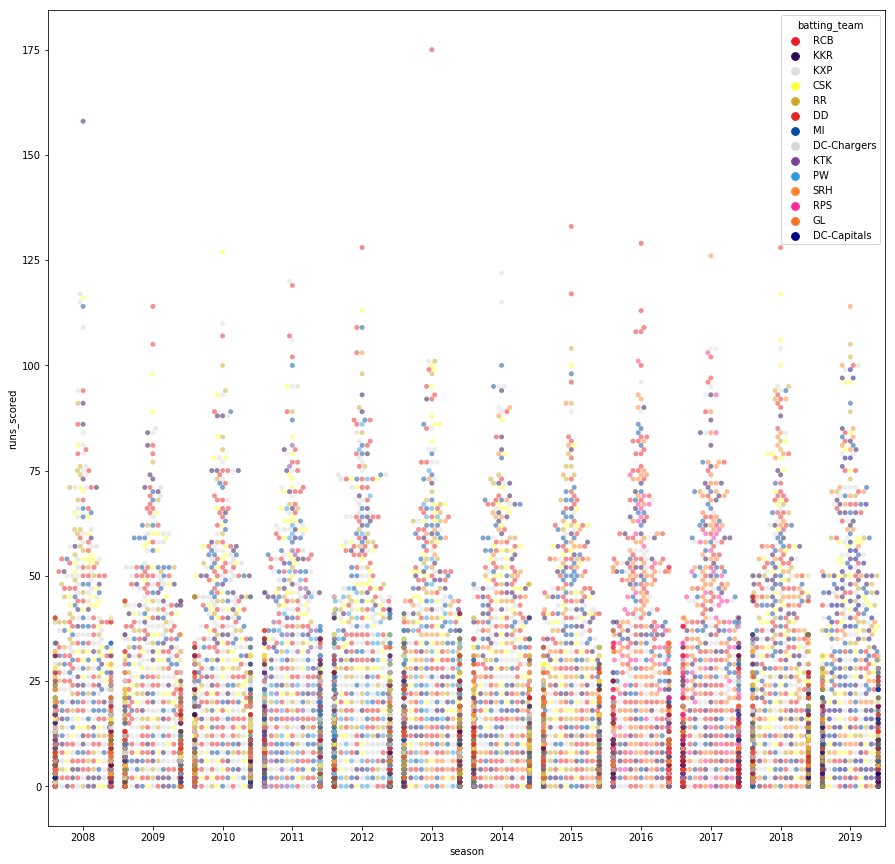

In [106]:
#plt.hist(df_batsman['runs_scored'])
plt.figure(figsize=(15,15))
sns.swarmplot(data=df_batsman,x='season',y='runs_scored',hue='batting_team',alpha=0.5);

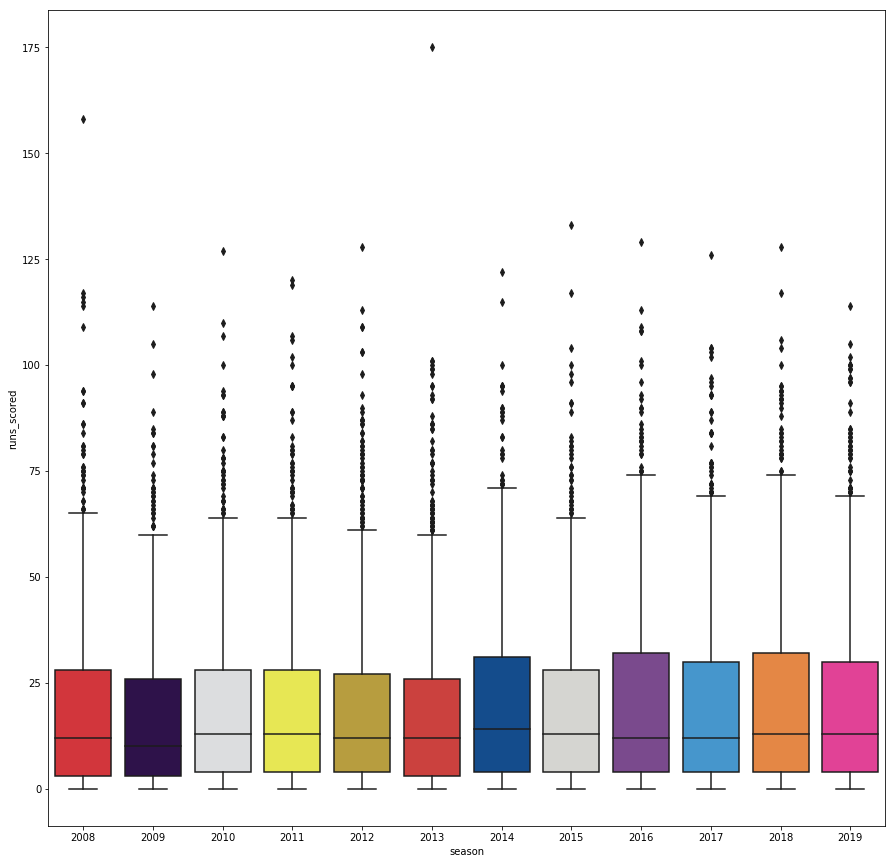

In [107]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df_batsman,x='season',y='runs_scored');

<Figure size 1080x1080 with 0 Axes>

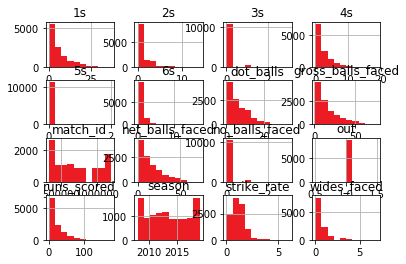

In [109]:
plt.figure(figsize=(15,15));
df_batsman.hist();

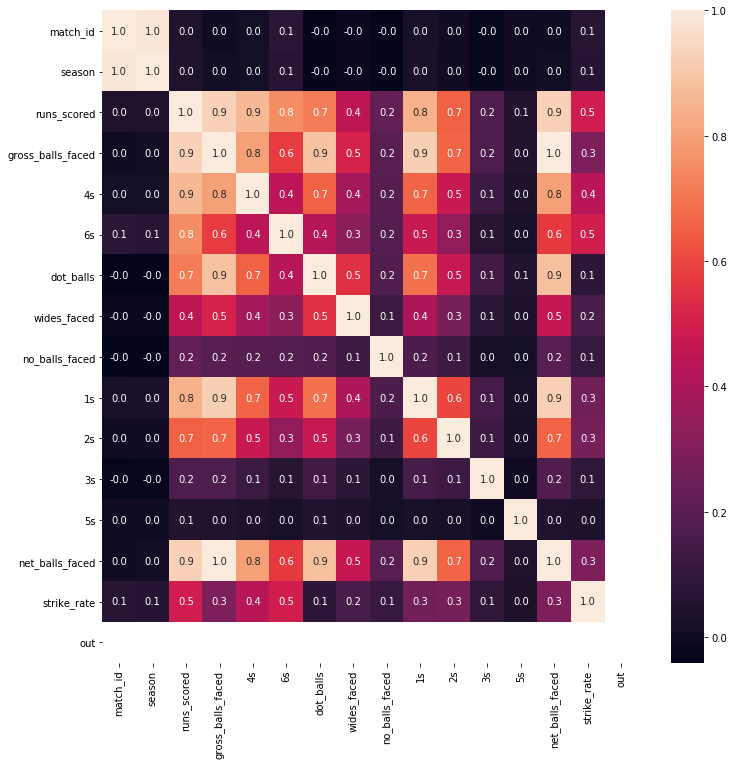

In [110]:
plt.figure(figsize=(12,12))
sns.heatmap(df_batsman.corr(),annot=True, fmt='.1f');

In [111]:
df_batsman['strike_rate'].mean()

1.1057432528313447

In [0]:
df_strike_rate_by_team_by_season = df_batsman.groupby(['season','batting_team'],as_index=False)['strike_rate'].mean()

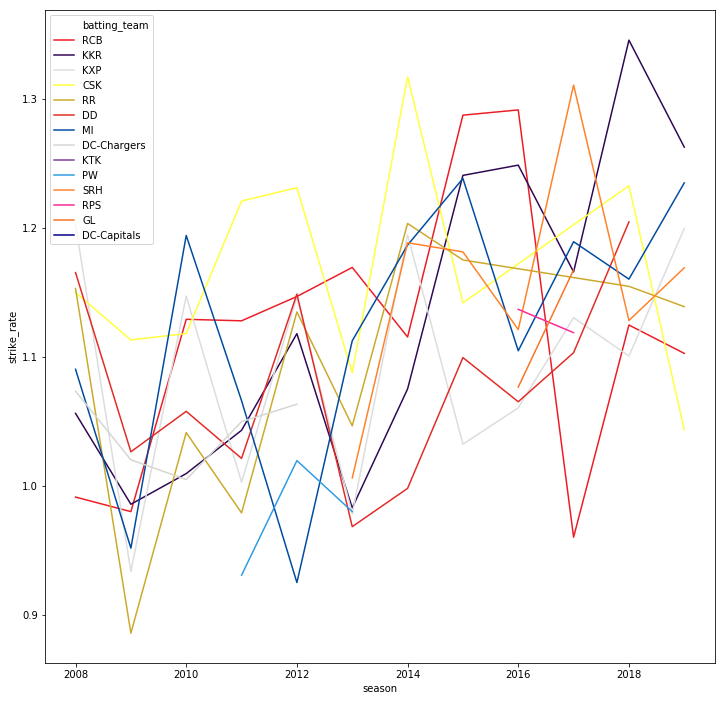

In [113]:
plt.figure(figsize=(12,12))
sns.lineplot(x='season',y='strike_rate',hue='batting_team',hue_order=list_of_teams,data=df_strike_rate_by_team_by_season);

In [114]:
list_of_seasons = list(df_batsman['season'].unique())
list_of_seasons

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [0]:
type(list_of_seasons[0])

numpy.int64

In [115]:
df_batsman[df_batsman['batting_team'] == list_of_teams[0]].head()

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,inning,player_out,out,batting_team
0,335982,2008,2008-04-18,AA Noffke,9.0,12,1,0,6,2.0,0.0,5,0,0,0,10.0,0.900000,inning_2,AA Noffke,1.0,RCB
1,335982,2008,2008-04-18,B Akhil,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000,inning_2,B Akhil,1.0,RCB
3,335982,2008,2008-04-18,CL White,6.0,10,0,0,5,0.0,0.0,4,1,0,0,10.0,0.600000,inning_2,CL White,1.0,RCB
5,335982,2008,2008-04-18,JH Kallis,8.0,7,0,1,4,0.0,0.0,2,0,0,0,7.0,1.142857,inning_2,JH Kallis,1.0,RCB
6,335982,2008,2008-04-18,MV Boucher,7.0,11,1,0,8,2.0,0.0,1,1,0,0,9.0,0.777778,inning_2,MV Boucher,1.0,RCB


In [0]:
team_batsman_performances = []


for team in list_of_teams:
  team_batsman_performances.append(df_batsman[df_batsman['batting_team'] == team])





In [0]:
team_batsman_seasonal_performances = []

for season in list_of_seasons:
  for team in list_of_teams:
    team_batsman_seasonal_performances.append(df_batsman[(df_batsman['batting_team'] == team) & (df_batsman['season'] == season)])

In [118]:
team_batsman_seasonal_performances[5].tail()

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,inning,player_out,out,batting_team
840,336038,2008,2008-05-30,Mohammad Asif,3.0,5,0,0,2,0.0,0.0,3,0,0,0,5.0,0.600000,inning_2,Mohammad Asif,1.0,DD
842,336038,2008,2008-05-30,S Dhawan,5.0,13,0,0,8,1.0,0.0,5,0,0,0,12.0,0.416667,inning_2,S Dhawan,1.0,DD
848,336038,2008,2008-05-30,TM Dilshan,33.0,22,5,1,10,0.0,0.0,5,1,0,0,22.0,1.500000,inning_2,TM Dilshan,1.0,DD
849,336038,2008,2008-05-30,V Sehwag,3.0,4,0,0,1,0.0,0.0,3,0,0,0,4.0,0.750000,inning_2,V Sehwag,1.0,DD
850,336038,2008,2008-05-30,VY Mahesh,3.0,10,0,0,7,0.0,0.0,3,0,0,0,10.0,0.300000,inning_2,VY Mahesh,1.0,DD


In [0]:
team_strikes = [x['strike_rate'].mean() for x in team_batsman_seasonal_performances]

In [0]:
team_strikes

[0.9915526515904464,
 1.056401825365469,
 1.202833079892754,
 1.1500481080399783,
 1.153153656296517,
 1.1655124216335568,
 1.0905828831996556,
 1.0735745081757324,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.980269384979976,
 0.9859907124685171,
 0.9338550272255335,
 1.1133368641156853,
 0.8860924435530904,
 1.026645595335463,
 0.9519835902880134,
 1.0204388374465228,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.1293190143081708,
 1.0097428916308409,
 1.1473498510657016,
 1.1182966318536849,
 1.0415134397952381,
 1.0579955834582566,
 1.1942763226406121,
 1.0051074247423446,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.1281516828912888,
 1.0432944813457987,
 1.0030985913310173,
 1.2209616454706356,
 0.9792700398288545,
 1.0215216383786907,
 1.066244561047606,
 1.0500003852836552,
 0.9461400163782536,
 0.9309989949723838,
 nan,
 nan,
 nan,
 nan,
 1.1469852030560925,
 1.1181871397959715,
 1.1467032824242247,
 1.2313113768975041,
 1.135057771584718,
 1.1488366146728968,
 0.9253144712768002,
 1.06353969794

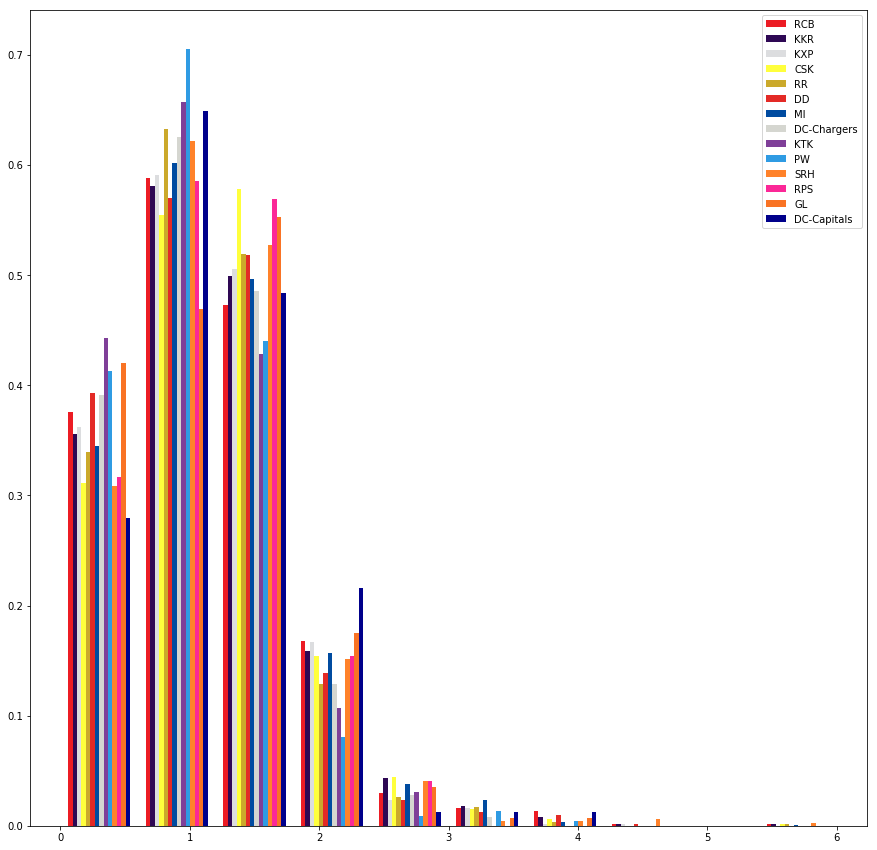

In [121]:
plt.figure(figsize=(15,15))
plt.hist([x['strike_rate'] for x in team_batsman_performances], density=1, histtype='bar',label=[x for x in list_of_teams]);
plt.legend()

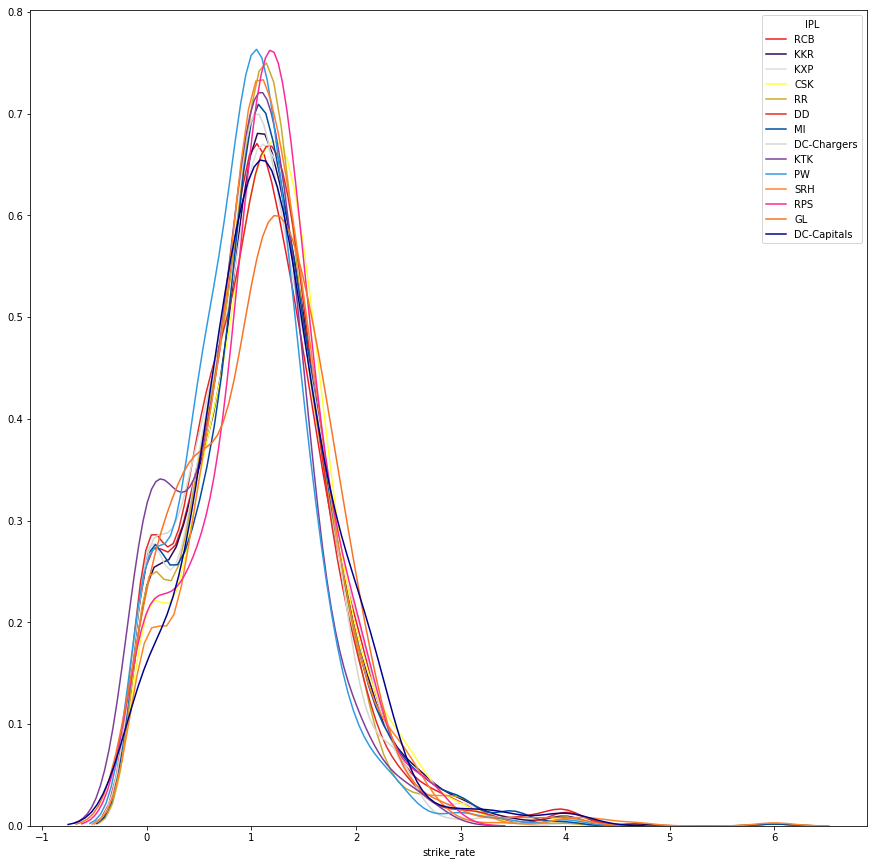

In [122]:
plt.figure(figsize=(15,15))
for i in range(len(list_of_teams)):
  g = sns.distplot(team_batsman_performances[i]['strike_rate'],rug=False,hist=False,label=list_of_teams[i])

plt.legend(title='IPL', loc='upper right')
plt.show(g)


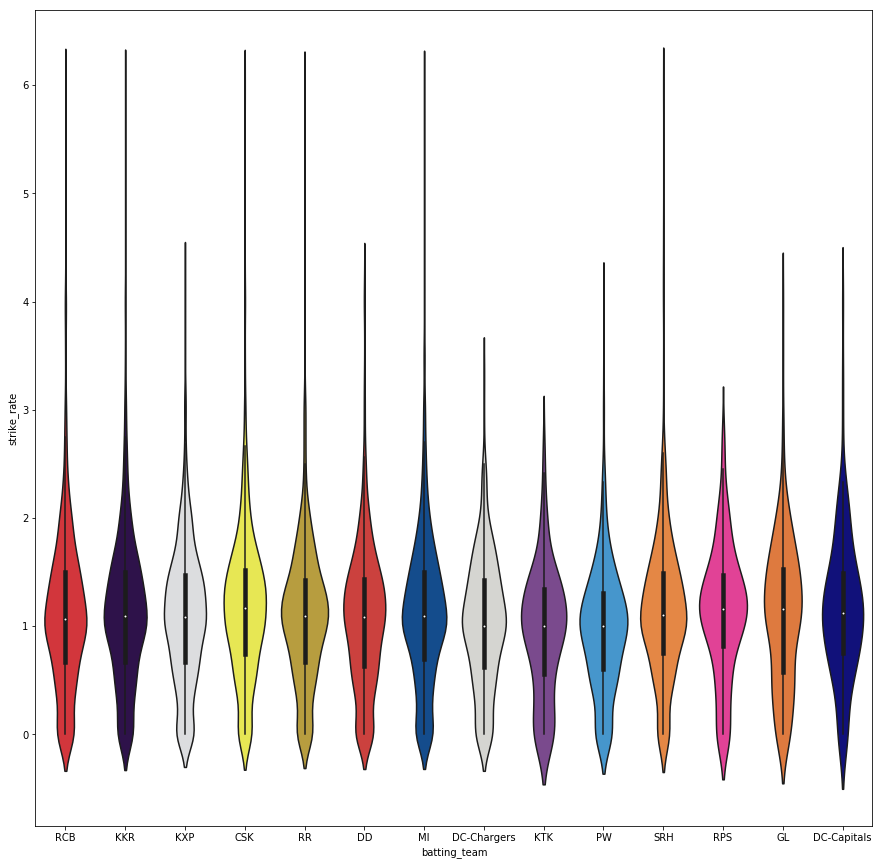

In [120]:
plt.figure(figsize=(15,15))



sns.violinplot(data=df_batsman, x='batting_team',y='strike_rate');

#plt.legend(title='IPL', loc='upper right')
#plt.show(x)





In [123]:
list_of_teams

['RCB',
 'KKR',
 'KXP',
 'CSK',
 'RR',
 'DD',
 'MI',
 'DC-Chargers',
 'KTK',
 'PW',
 'SRH',
 'RPS',
 'GL',
 'DC-Capitals']

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


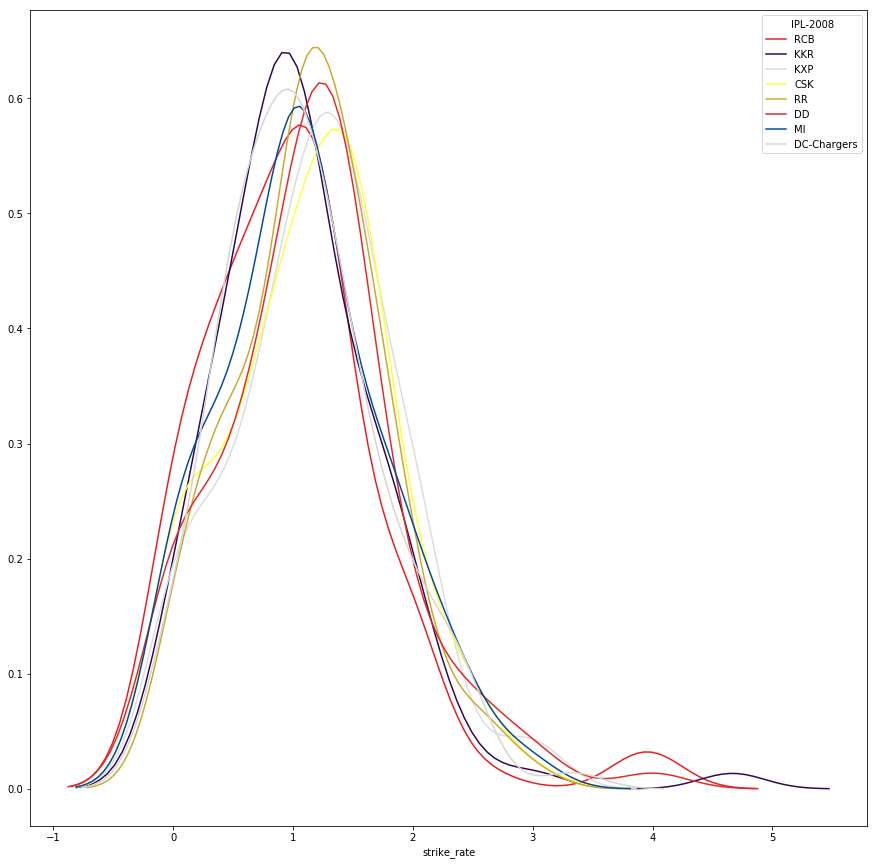

In [124]:
plt.figure(figsize=(15,15))
for i in range(len(list_of_teams)):
  g = sns.distplot(team_batsman_seasonal_performances[i]['strike_rate'],rug=False,hist=False,label=list_of_teams[i])

plt.legend(title='IPL-2008', loc='upper right')
plt.show(g)

## Runs being scored by season

## Runs by innings by season

## Highest run scorer

In [125]:
df_batsman.head()

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,inning,player_out,out,batting_team
0,335982,2008,2008-04-18,AA Noffke,9.0,12,1,0,6,2.0,0.0,5,0,0,0,10.0,0.900000,inning_2,AA Noffke,1.0,RCB
1,335982,2008,2008-04-18,B Akhil,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000,inning_2,B Akhil,1.0,RCB
2,335982,2008,2008-04-18,BB McCullum,158.0,77,10,13,23,4.0,0.0,22,9,0,0,73.0,2.164384,NaN,NaN,NaN,KKR
3,335982,2008,2008-04-18,CL White,6.0,10,0,0,5,0.0,0.0,4,1,0,0,10.0,0.600000,inning_2,CL White,1.0,RCB
4,335982,2008,2008-04-18,DJ Hussey,12.0,12,1,0,4,0.0,0.0,6,1,0,0,12.0,1.000000,inning_1,DJ Hussey,1.0,KKR


In [0]:
def flag_200s(row):
  if row['runs_scored'] >= 200:
    value = 1
  else:
    value = 0
  return value

def flag_100s(row):
  if (row['runs_scored'] >= 100) & (row['runs_scored'] < 200):
    value = 1
  else:
    value = 0
  return value

def flag_50s(row):
  if (row['runs_scored'] >= 50) & (row['runs_scored'] < 100):
    value = 1
  else:
    value = 0
  return value

def flag_30s(row):
  if (row['runs_scored'] >= 30) & (row['runs_scored'] < 50):
    value = 1
  else:
    value = 0
  return value

def calc_boundary_hit_rate(row):
  if row['net_balls_faced'] != 0:
    value = (row['6s']+row['5s']+row['4s'])/row['net_balls_faced']
  else:
    value = 0
  return value

def calc_farming_rate(row):
  if row['net_balls_faced'] != 0:
    value = (row['3s']+row['2s']+row['1s'])/row['net_balls_faced']
  else:
    value = 0
  return value

def calc_dot_ball_rate(row):
  if row['net_balls_faced'] != 0:
    value = (row['dot_balls'])/row['net_balls_faced']
  else:
    value = 0
  return value



In [0]:
df_batsman['200s'] = df_batsman.apply(lambda row: flag_200s(row),axis=1)
df_batsman['100s'] = df_batsman.apply(lambda row: flag_100s(row),axis=1)
df_batsman['50s'] = df_batsman.apply(lambda row: flag_50s(row),axis=1)
df_batsman['30s'] = df_batsman.apply(lambda row: flag_30s(row),axis=1)
df_batsman['boundary_hit_rate'] = df_batsman.apply(lambda row: calc_boundary_hit_rate(row),axis=1)
df_batsman['farming_rate'] = df_batsman.apply(lambda row: calc_farming_rate(row),axis=1)
df_batsman['dot_rate'] = df_batsman.apply(lambda row: calc_dot_ball_rate(row),axis=1)

In [128]:
df_batsman.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11294 entries, 0 to 11293
Data columns (total 28 columns):
match_id             11294 non-null int64
season               11294 non-null int64
match_date           11294 non-null object
batsman              11294 non-null object
runs_scored          11294 non-null float64
gross_balls_faced    11294 non-null int64
4s                   11294 non-null int64
6s                   11294 non-null int64
dot_balls            11294 non-null int64
wides_faced          11294 non-null float64
no_balls_faced       11294 non-null float64
1s                   11294 non-null int64
2s                   11294 non-null int64
3s                   11294 non-null int64
5s                   11294 non-null int64
net_balls_faced      11294 non-null float64
strike_rate          11294 non-null float64
inning               8787 non-null object
player_out           8787 non-null object
out                  8787 non-null float64
batting_team         11294 non-null ob

In [129]:
df_batsman.tail()

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,inning,player_out,out,batting_team,200s,100s,50s,30s,boundary_hit_rate,farming_rate,dot_rate
11289,1181768,2019,2019-05-12,RG Sharma,15.0,14,1,1,8,0.0,0.0,3,1,0,0,14.0,1.071429,inning_1,RG Sharma,1.0,MI,0,0,0,0,0.142857,0.285714,0.571429
11290,1181768,2019,2019-05-12,SA Yadav,15.0,17,1,0,6,0.0,0.0,9,1,0,0,17.0,0.882353,inning_1,SA Yadav,1.0,MI,0,0,0,0,0.058824,0.588235,0.352941
11291,1181768,2019,2019-05-12,SK Raina,8.0,15,0,0,8,1.0,0.0,6,1,0,0,14.0,0.571429,inning_2,SK Raina,1.0,CSK,0,0,0,0,0.000000,0.466667,0.533333
11292,1181768,2019,2019-05-12,SN Thakur,2.0,2,0,0,1,0.0,0.0,0,1,0,0,2.0,1.000000,inning_2,SN Thakur,1.0,CSK,0,0,0,0,0.000000,0.500000,0.500000
11293,1181768,2019,2019-05-12,SR Watson,80.0,62,8,4,30,3.0,0.0,16,4,0,0,59.0,1.355932,inning_2,SR Watson,1.0,CSK,0,0,1,0,0.193548,0.322581,0.483871


In [131]:
df_batsman[['season','batsman','runs_scored','net_balls_faced','100s','50s','30s','6s','5s','4s','3s','2s','1s','dot_balls','strike_rate']].sort_values(by=['runs_scored'],ascending=False).head(10)

,season,batsman,runs_scored,net_balls_faced,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,strike_rate
5302,2013,CH Gayle,175.0,66.0,1,0,0,17,0,13,0,0,21,18,2.651515
2,2008,BB McCullum,158.0,73.0,1,0,0,13,0,10,0,9,22,23,2.164384
7528,2015,AB de Villiers,133.0,59.0,1,0,0,4,0,19,0,7,19,12,2.254237
8359,2016,AB de Villiers,129.0,52.0,1,0,0,12,0,10,0,1,15,15,2.480769
4687,2012,CH Gayle,128.0,62.0,1,0,0,13,0,7,0,1,20,21,2.064516
10149,2018,RR Pant,128.0,63.0,1,0,0,7,0,15,0,2,22,18,2.031746
2237,2010,M Vijay,127.0,56.0,1,0,0,11,1,8,0,2,20,15,2.267857
9146,2017,DA Warner,126.0,59.0,1,0,0,8,0,10,2,7,18,15,2.135593
6854,2014,V Sehwag,122.0,58.0,1,0,0,8,0,12,0,2,22,18,2.103448
2788,2011,PC Valthaty,120.0,63.0,1,0,0,2,0,19,0,5,22,16,1.904762


In [0]:
def calc_batting_strike_rate(row):
  if row['net_balls_faced'] != 0:
    value = row['runs_scored']/row['net_balls_faced']
  else:
    value = 0
  return value

def calc_batting_avg(row):
  if row['out'] != 0:
    value = row['runs_scored']/row['out']
  else:
    value = 0
  return value

def calc_balls_per_inning(row):
  if row['out'] != 0:
    value = row['net_balls_faced']/row['out']
  else:
    value = 0
  return value

In [0]:
df_batsman_seasonal_stats = df_batsman[['season','batsman','runs_scored','gross_balls_faced','net_balls_faced',\
                                        'out','100s','50s','30s','6s','5s','4s','3s','2s',\
                                        '1s','dot_balls','strike_rate']].groupby(['season','batsman'],as_index=False)['runs_scored','gross_balls_faced','net_balls_faced','out',\
                                                                                          '100s','50s','30s','6s','5s','4s','3s',\
                                                                                          '2s','1s','dot_balls'].sum()

In [134]:
df_batsman_seasonal_stats.head(10)

,season,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls
0,2008,A Chopra,42.0,55,52.0,5.0,0,0,0,0,0,5,0,2,18,30
1,2008,A Kumble,13.0,17,17.0,2.0,0,0,0,0,0,1,0,1,7,8
2,2008,A Mishra,37.0,42,42.0,3.0,0,0,1,0,0,3,0,2,21,16
3,2008,A Mukund,0.0,1,1.0,1.0,0,0,0,0,0,0,0,0,0,1
4,2008,A Nehra,3.0,13,13.0,1.0,0,0,0,0,0,0,0,0,3,10
5,2008,A Symonds,161.0,111,105.0,2.0,1,0,1,9,0,15,1,5,34,47
6,2008,AA Noffke,9.0,12,10.0,1.0,0,0,0,0,0,1,0,0,5,6
7,2008,AB Agarkar,54.0,49,46.0,5.0,0,0,0,2,0,5,0,4,14,24
8,2008,AB Dinda,2.0,4,4.0,1.0,0,0,0,0,0,0,0,0,2,2
9,2008,AB de Villiers,95.0,100,98.0,5.0,0,0,0,1,0,5,0,16,37,41


In [193]:
df_batsman_seasonal_stats['season_strike_rate'] = df_batsman_seasonal_stats.apply(lambda row: calc_batting_strike_rate(row),axis=1)
df_batsman_seasonal_stats['season_batting_avg'] = df_batsman_seasonal_stats.apply(lambda row: calc_batting_avg(row),axis=1)
df_batsman_seasonal_stats['balls_per_inning'] = df_batsman_seasonal_stats.apply(lambda row: calc_balls_per_inning(row),axis=1)

df_batsman_seasonal_stats['boundary_hit_rate'] = df_batsman_seasonal_stats.apply(lambda row: calc_boundary_hit_rate(row),axis=1)
df_batsman_seasonal_stats['farming_rate'] = df_batsman_seasonal_stats.apply(lambda row: calc_farming_rate(row),axis=1)
df_batsman_seasonal_stats['dot_rate'] = df_batsman_seasonal_stats.apply(lambda row: calc_dot_ball_rate(row),axis=1)


df_batsman_seasonal_stats.head()


,season,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,season_strike_rate,season_batting_avg,balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
0,2008,A Chopra,42.0,55,52.0,5.0,0,0,0,0,0,5,0,2,18,30,0.807692,8.400000,10.4,0.096154,0.384615,0.576923
1,2008,A Kumble,13.0,17,17.0,2.0,0,0,0,0,0,1,0,1,7,8,0.764706,6.500000,8.5,0.058824,0.470588,0.470588
2,2008,A Mishra,37.0,42,42.0,3.0,0,0,1,0,0,3,0,2,21,16,0.880952,12.333333,14.0,0.071429,0.547619,0.380952
3,2008,A Mukund,0.0,1,1.0,1.0,0,0,0,0,0,0,0,0,0,1,0.000000,0.000000,1.0,0.000000,0.000000,1.000000
4,2008,A Nehra,3.0,13,13.0,1.0,0,0,0,0,0,0,0,0,3,10,0.230769,3.000000,13.0,0.000000,0.230769,0.769231


In [136]:
df_batsman_seasonal_stats.sort_values(by=['season_batting_avg','season_strike_rate','balls_per_inning'],ascending=False).head(20)

,season,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,season_strike_rate,season_batting_avg,balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
60,2008,LA Pomersbach,152.0,101,99.0,1.0,0,1,1,9,0,13,0,3,40,36,1.535354,152.000000,99.000000,0.217822,0.425743,0.356436
119,2008,SM Katich,96.0,72,69.0,1.0,0,1,0,2,0,11,1,8,21,29,1.391304,96.000000,69.000000,0.180556,0.416667,0.402778
1172,2015,JA Morkel,86.0,70,65.0,1.0,0,1,0,2,0,9,0,5,28,26,1.323077,86.000000,65.000000,0.157143,0.471429,0.371429
70,2008,MEK Hussey,168.0,100,100.0,2.0,1,0,1,11,0,12,0,8,38,31,1.680000,84.000000,50.000000,0.230000,0.460000,0.310000
227,2009,MK Pandey,168.0,120,118.0,2.0,1,0,1,4,0,17,0,18,40,41,1.423729,84.000000,59.000000,0.175000,0.483333,0.341667
1748,2019,MS Dhoni,416.0,317,309.0,5.0,0,3,4,23,0,22,0,35,120,117,1.346278,83.200000,61.800000,0.141956,0.488959,0.369085
725,2012,JP Duminy,244.0,195,190.0,3.0,0,2,0,11,0,13,0,17,92,62,1.284211,81.333333,63.333333,0.123077,0.558974,0.317949
1383,2016,V Kohli,973.0,655,640.0,12.0,4,7,1,38,0,84,2,56,291,184,1.520312,81.083333,53.333333,0.186260,0.532824,0.280916
5,2008,A Symonds,161.0,111,105.0,2.0,1,0,1,9,0,15,1,5,34,47,1.533333,80.500000,52.500000,0.216216,0.360360,0.423423
1612,2018,MS Dhoni,455.0,321,302.0,6.0,0,3,3,30,0,24,2,18,137,110,1.506623,75.833333,50.333333,0.168224,0.489097,0.342679


In [137]:
df_batsman_seasonal_stats.query('batsman=="MS Dhoni"')

,season,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,season_strike_rate,season_batting_avg,balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
76,2008,MS Dhoni,414.0,319,310.0,10.0,0,2,6,15,0,38,2,26,114,124,1.335484,41.400000,31.000000,0.166144,0.445141,0.388715
232,2009,MS Dhoni,332.0,270,261.0,8.0,0,2,2,9,0,22,1,24,139,75,1.272031,41.500000,32.625000,0.114815,0.607407,0.277778
398,2010,MS Dhoni,287.0,215,210.0,9.0,0,2,3,8,0,26,0,20,95,66,1.366667,31.888889,23.333333,0.158140,0.534884,0.306977
567,2011,MS Dhoni,392.0,247,247.0,9.0,0,2,2,23,0,25,1,22,107,69,1.587045,43.555556,27.444444,0.194332,0.526316,0.279352
751,2012,MS Dhoni,357.0,283,278.0,12.0,0,1,3,9,0,26,1,37,122,88,1.284173,29.750000,23.166667,0.123675,0.565371,0.310954
918,2013,MS Dhoni,461.0,298,283.0,11.0,0,4,3,25,0,32,3,30,114,94,1.628975,41.909091,25.727273,0.191275,0.493289,0.315436
1066,2014,MS Dhoni,371.0,258,250.0,5.0,0,1,3,20,0,22,2,28,101,85,1.484000,74.200000,50.000000,0.162791,0.507752,0.329457
1197,2015,MS Dhoni,372.0,309,305.0,12.0,0,1,4,17,0,27,0,24,114,127,1.219672,31.000000,25.416667,0.142395,0.446602,0.411003
1332,2016,MS Dhoni,284.0,220,210.0,7.0,0,1,3,14,0,18,1,20,85,82,1.352381,40.571429,30.000000,0.145455,0.481818,0.372727
1471,2017,MS Dhoni,290.0,261,250.0,11.0,0,1,2,16,0,15,0,20,94,116,1.160000,26.363636,22.727273,0.118774,0.436782,0.444444


In [0]:
df_mvp = pd.DataFrame(df_batsman_seasonal_stats.\
                      groupby('batsman',as_index=False)\
                      ['runs_scored','gross_balls_faced','net_balls_faced','out',\
                       '100s','50s','30s','6s','5s','4s','3s','2s','1s','dot_balls']\
                      .sum()\
                      .sort_values(by=['runs_scored','gross_balls_faced','net_balls_faced','100s','50s','30s'],\
                                   ascending=False)['batsman']\
                      .head(10)\
                      .reset_index(drop=True))



In [139]:
list(df_mvp['batsman'])


['V Kohli',
 'SK Raina',
 'RG Sharma',
 'DA Warner',
 'S Dhawan',
 'CH Gayle',
 'MS Dhoni',
 'RV Uthappa',
 'AB de Villiers',
 'G Gambhir']

In [140]:
df_mvp

,batsman
0,V Kohli
1,SK Raina
2,RG Sharma
3,DA Warner
4,S Dhawan
5,CH Gayle
6,MS Dhoni
7,RV Uthappa
8,AB de Villiers
9,G Gambhir


In [0]:
mvp_list = df_mvp['batsman']

In [142]:
len(mvp_list)

10

In [0]:
df_mvp_comparison = df_batsman_seasonal_stats.groupby('batsman',as_index=False)['runs_scored','gross_balls_faced','net_balls_faced','out',\
                                                            '100s','50s','30s','6s','5s','4s','3s',\
                                                            '2s','1s','dot_balls'].sum().query('batsman in @mvp_list') 



In [194]:
df_mvp_comparison['ipl_strike_rate'] = df_mvp_comparison.apply(lambda row: calc_batting_strike_rate(row),axis=1)
df_mvp_comparison['ipl_batting_avg'] = df_mvp_comparison.apply(lambda row: calc_batting_avg(row),axis=1)
df_mvp_comparison['ipl_balls_per_inning'] = df_mvp_comparison.apply(lambda row: calc_balls_per_inning(row),axis=1)

df_mvp_comparison['boundary_hit_rate'] = df_mvp_comparison.apply(lambda row: calc_boundary_hit_rate(row),axis=1)
df_mvp_comparison['farming_rate'] = df_mvp_comparison.apply(lambda row: calc_farming_rate(row),axis=1)
df_mvp_comparison['dot_rate'] = df_mvp_comparison.apply(lambda row: calc_dot_ball_rate(row),axis=1)


df_mvp_comparison = df_mvp_comparison.sort_values(by=['runs_scored','gross_balls_faced','net_balls_faced','100s','50s','30s'],\
                                   ascending=False).reset_index(drop=True)

df_mvp_comparison

,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,ipl_strike_rate,ipl_batting_avg,ipl_balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
0,V Kohli,5412.0,4208,4111.0,143.0,5,36,36,191,0,481,11,292,1725,1508,1.316468,37.846154,28.748252,0.163464,0.493311,0.366821
1,SK Raina,5368.0,4041,3914.0,161.0,1,38,37,194,1,493,11,264,1666,1412,1.371487,33.341615,24.310559,0.175779,0.495912,0.360756
2,RG Sharma,4898.0,3816,3744.0,154.0,1,36,31,195,1,431,5,204,1576,1404,1.308226,31.805195,24.311688,0.167468,0.476763,0.375000
3,DA Warner,4706.0,3397,3305.0,109.0,4,44,19,181,1,458,17,270,1192,1278,1.423903,43.174312,30.321101,0.193646,0.447504,0.386687
4,S Dhawan,4579.0,3775,3669.0,138.0,0,37,26,96,2,524,18,201,1441,1493,1.248024,33.181159,26.586957,0.169528,0.452439,0.406923
5,CH Gayle,4484.0,3118,2969.0,109.0,6,28,21,326,0,369,3,80,883,1457,1.510273,41.137615,27.238532,0.234086,0.325362,0.490738
6,MS Dhoni,4431.0,3318,3215.0,105.0,0,23,38,209,0,297,13,304,1342,1153,1.378227,42.200000,30.619048,0.157387,0.516019,0.358631
7,RV Uthappa,4411.0,3488,3380.0,153.0,0,24,40,156,3,435,13,205,1271,1405,1.305030,28.830065,22.091503,0.175740,0.440533,0.415680
8,AB de Villiers,4395.0,2972,2906.0,110.0,3,33,20,212,0,357,15,220,1210,958,1.512388,39.954545,26.418182,0.195802,0.497247,0.329663
9,G Gambhir,4217.0,3524,3404.0,135.0,0,36,22,59,0,492,15,249,1352,1357,1.238837,31.237037,25.214815,0.161868,0.474736,0.398649


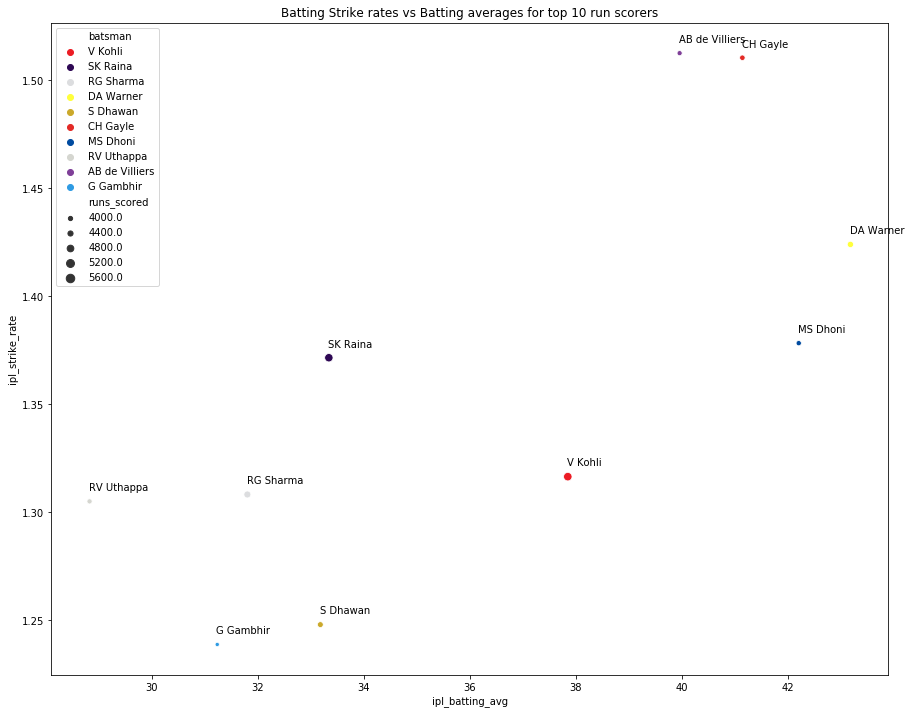

In [195]:
plt.figure(figsize=(15,12))
p1 = sns.scatterplot(x="ipl_batting_avg", y="ipl_strike_rate",\
                     hue='batsman', hue_order=mvp_list,size='runs_scored',\
                     data=df_mvp_comparison\
                     
                    )
for line in range(0,df_mvp_comparison.shape[0]):
  p1.text(df_mvp_comparison.ipl_batting_avg[line]-0.015,df_mvp_comparison.ipl_strike_rate[line]+0.005,df_mvp_comparison.batsman[line])

p1.set_title('Batting Strike rates vs Batting averages for top 10 run scorers')
plt.show(p1)



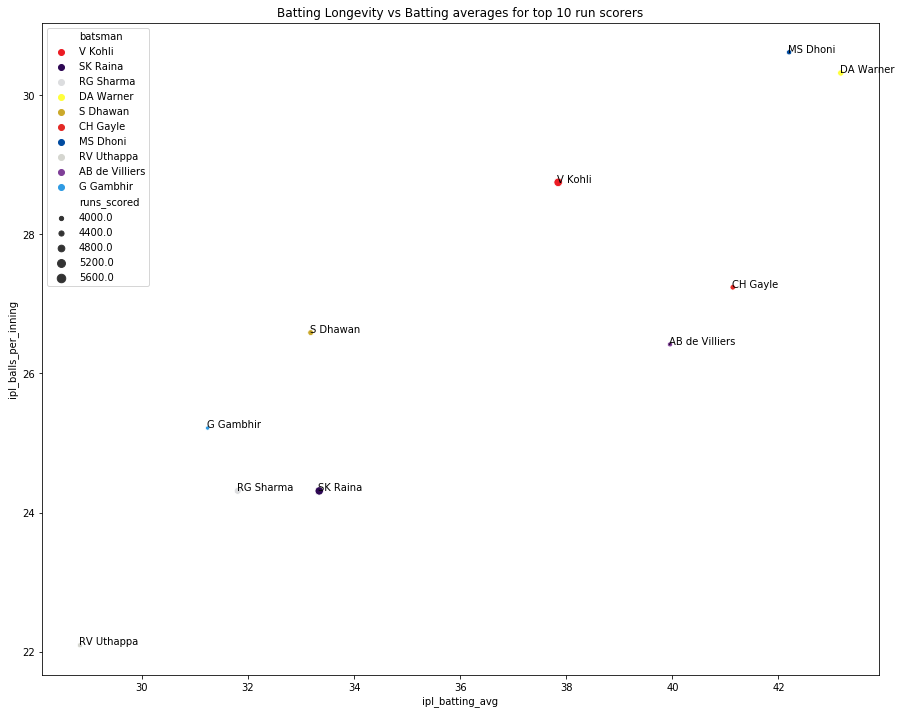

In [146]:
plt.figure(figsize=(15,12))
p2 = sns.scatterplot(x="ipl_batting_avg", y="ipl_balls_per_inning",\
                     hue='batsman', hue_order=mvp_list,size='runs_scored',\
                     data=df_mvp_comparison\
                     
                    )
for line in range(0,df_mvp_comparison.shape[0]):
  p2.text(df_mvp_comparison.ipl_batting_avg[line]-0.015,df_mvp_comparison.ipl_balls_per_inning[line]+0.005,df_mvp_comparison.batsman[line])

p2.set_title('Batting Longevity vs Batting averages for top 10 run scorers')
plt.show(p2)

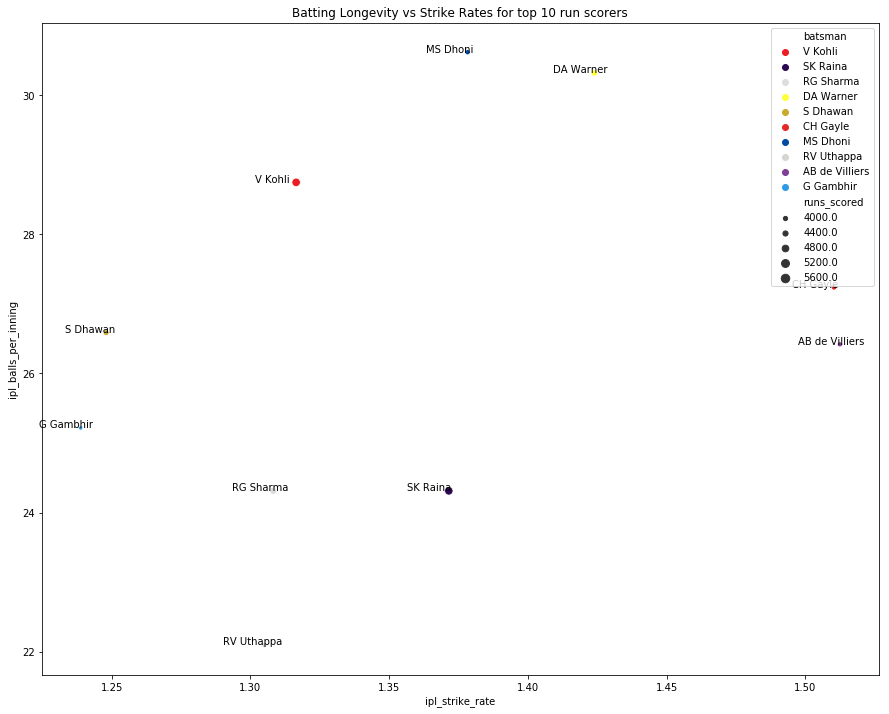

In [147]:
plt.figure(figsize=(15,12))
p3 = sns.scatterplot(x="ipl_strike_rate", y="ipl_balls_per_inning",\
                     hue='batsman', hue_order=mvp_list,size='runs_scored',\
                     data=df_mvp_comparison\
                     
                    )
for line in range(0,df_mvp_comparison.shape[0]):
  p3.text(df_mvp_comparison.ipl_strike_rate[line]-0.015,df_mvp_comparison.ipl_balls_per_inning[line]+0.005,df_mvp_comparison.batsman[line])

p3.set_title('Batting Longevity vs Strike Rates for top 10 run scorers')
plt.show(p3)

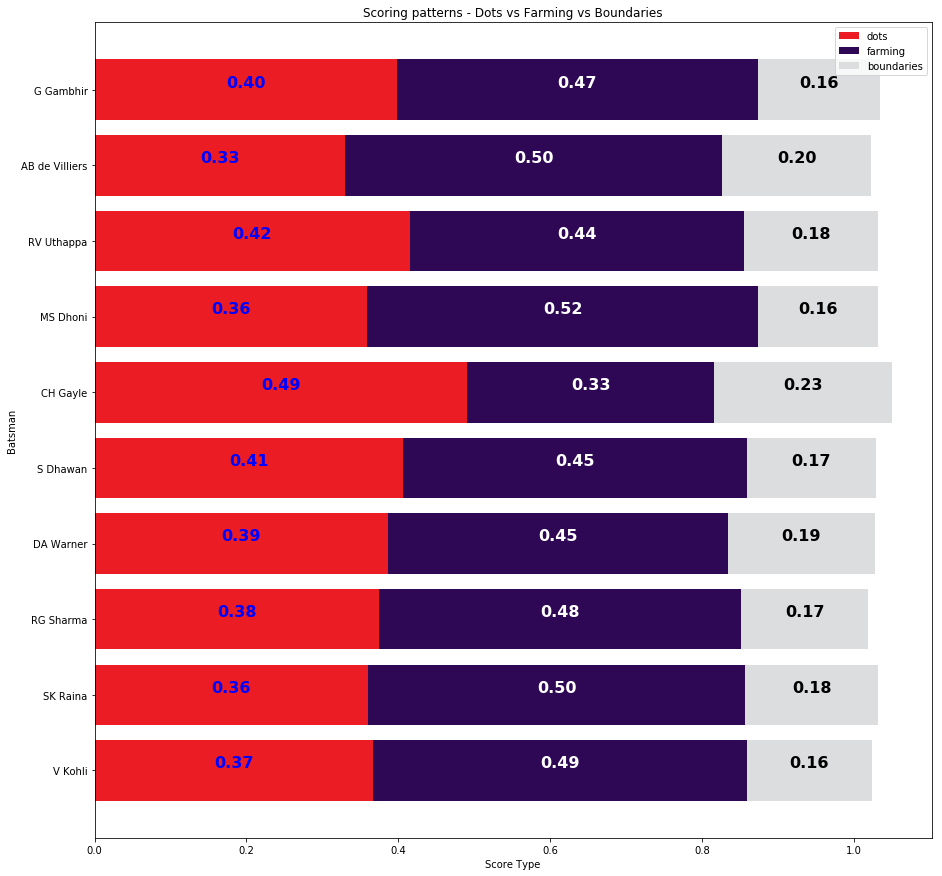

In [200]:
plt.figure(figsize=(15,15))

p4 = plt.barh(y=df_mvp_comparison['batsman'],width=df_mvp_comparison['dot_rate'])
p5 = plt.barh(y=df_mvp_comparison['batsman'],width=df_mvp_comparison['farming_rate'],left=df_mvp_comparison['dot_rate'])
p6 = plt.barh(y=df_mvp_comparison['batsman'],width=df_mvp_comparison['boundary_hit_rate'],left=df_mvp_comparison['dot_rate']+df_mvp_comparison['farming_rate'])


for r1, r2, r3 in zip(p4, p5, p6):
    w1 = r1.get_width()
    w2 = r2.get_width()
    w3 = r3.get_width()
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x()+w1/2.,r1.get_y()+h1/2.,"%.2f" % w1,ha="center", va="bottom", color="blue", fontsize=16, fontweight="bold")
    plt.text(r2.get_x()+w2/2.,r2.get_y()+h2/2.,"%.2f" % w2,ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")
    plt.text(r3.get_x()+w3/2.,r3.get_y()+h3/2.,"%.2f" % w3,ha="center", va="bottom", color="black", fontsize=16, fontweight="bold")
        
    

plt.ylabel('Batsman')
plt.xlabel('Score Type')
plt.title('Scoring patterns - Dots vs Farming vs Boundaries')

plt.legend((p4,p5,p6),('dots','farming','boundaries'),loc='best')

plt.show()

In [201]:
df_mvp_comparison.ipl_batting_avg[0]

37.84615384615385

In [202]:
df_mvp_comparison.shape[0]

10

In [0]:
df_best_batsman = df_batsman.merge(df_mvp,how='right',left_on=['batsman'],right_on=['batsman'])

In [0]:
df_best_batsman.head()

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,level_0,player_out,out,batting_team,200s,100s,50s,30s,boundary_hit_rate,farming_rate,dot_rate
0,335982,2008,2008-04-18,V Kohli,1.0,5,0,0,4,0.0,0.0,1,0,0,0,5.0,0.200000,inning_2,V Kohli,1.0,RCB,0,0,0,0,0.000000,0.200000,0.800000
1,335985,2008,2008-04-20,V Kohli,23.0,15,3,1,6,1.0,0.0,5,0,0,0,14.0,1.642857,inning_2,V Kohli,1.0,RCB,0,0,0,0,0.266667,0.333333,0.400000
2,335992,2008,2008-04-26,V Kohli,13.0,16,0,1,9,2.0,0.0,5,1,0,0,14.0,0.928571,inning_1,V Kohli,1.0,RCB,0,0,0,0,0.062500,0.375000,0.562500
3,335996,2008,2008-04-28,V Kohli,12.0,7,2,0,2,0.0,0.0,2,1,0,0,7.0,1.714286,inning_2,V Kohli,1.0,RCB,0,0,0,0,0.285714,0.428571,0.285714
4,335998,2008,2008-04-30,V Kohli,1.0,1,0,0,0,0.0,0.0,1,0,0,0,1.0,1.000000,NaN,NaN,NaN,RCB,0,0,0,0,0.000000,1.000000,0.000000


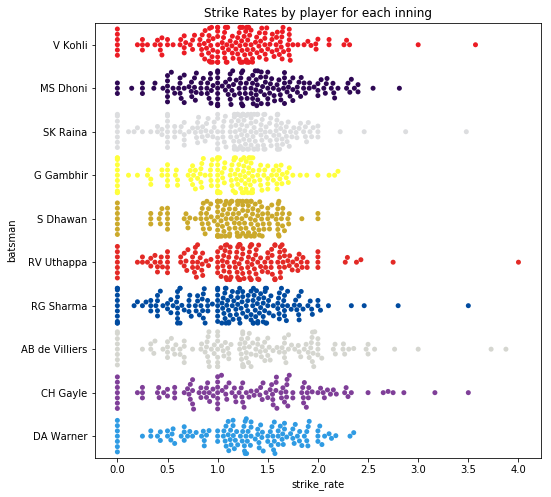

In [205]:
plt.figure(figsize=(8,8));
sns.swarmplot(data=df_best_batsman,x='strike_rate',y='batsman').set_title('Strike Rates by player for each inning');
#sns.violinplot(data=df_best_batsman,x='strike_rate',y='batsman')

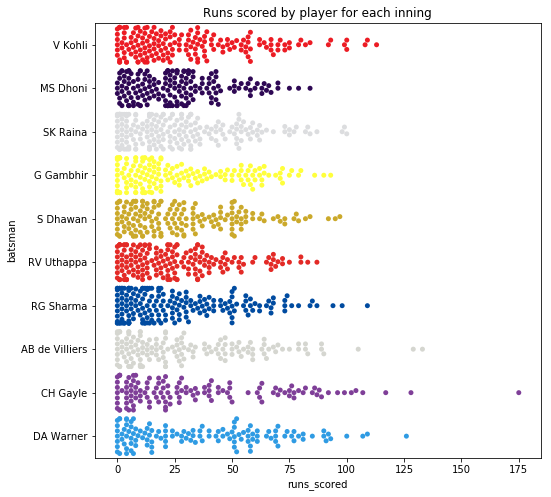

In [206]:
plt.figure(figsize=(8,8))
sns.swarmplot(data=df_best_batsman,x='runs_scored',y='batsman').set_title('Runs scored by player for each inning');

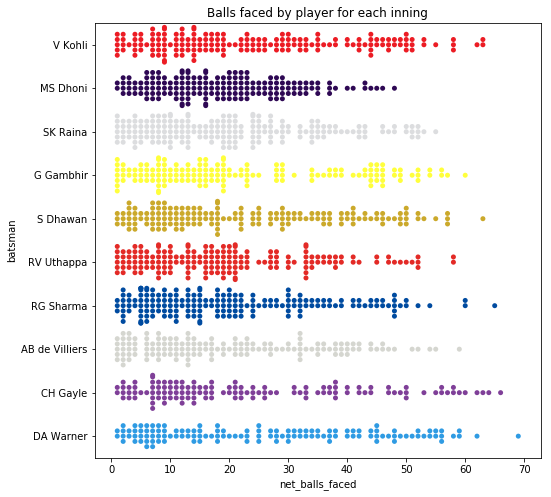

In [208]:
plt.figure(figsize=(8,8))
sns.swarmplot(data=df_best_batsman,x='net_balls_faced',y='batsman').set_title('Balls faced by player for each inning');

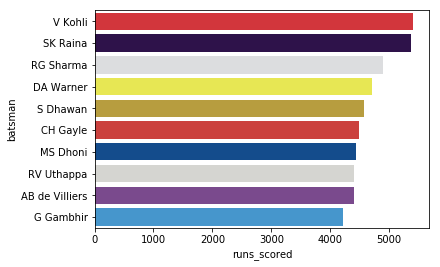

In [209]:
sns.barplot(data=df_mvp_comparison,x='runs_scored',y='batsman');

In [210]:
df_match_summary['player_of_match'].value_counts()

CH Gayle            21
AB de Villiers      20
DA Warner           17
RG Sharma           17
MS Dhoni            17
YK Pathan           16
SR Watson           15
SK Raina            14
G Gambhir           13
V Kohli             12
AM Rahane           12
MEK Hussey          12
V Sehwag            11
DR Smith            11
A Mishra            11
AD Russell          11
JH Kallis           10
KA Pollard          10
SE Marsh             9
SP Narine            9
AT Rayudu            9
Harbhajan Singh      8
RA Jadeja            8
UT Yadav             8
SR Tendulkar         8
Rashid Khan          7
AC Gilchrist         7
RV Uthappa           7
RR Pant              6
S Dhawan             6
                    ..
AP Tare              1
S Nadeem             1
MD Mishra            1
AD Mathews           1
KMA Paul             1
GJ Bailey            1
PP Ojha              1
Mujeeb Ur Rahman     1
DL Chahar            1
MN Samuels           1
RJ Harris            1
PP Shaw              1
S Badrinath

In [211]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 46 columns):
batsman                       178940 non-null object
batsman_runs                  178940 non-null float64
batting_team                  178949 non-null object
bowler                        178940 non-null object
byes                          480 non-null float64
extras_runs                   178299 non-null float64
kind                          8827 non-null object
legbyes                       2933 non-null float64
inning                        178949 non-null object
delivery                      178949 non-null object
match_id                      178949 non-null int64
noballs                       712 non-null float64
non_striker                   178940 non-null object
player_out                    8827 non-null object
total                         178940 non-null float64
wides                         5405 non-null float64
non_boundary                  14 non-null float64

In [212]:
df_details.head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag
0,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,1,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
1,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,2,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
2,PA Patel,1.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,3,548314,NaN,S Dhawan,NaN,1.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Q1,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
3,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,4,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
4,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,5,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False


In [214]:
df_details.query('match_id==335982' ).groupby(['inning','inning_quarter'],as_index=False)['total','batsman_runs','extras_runs','byes','legbyes','wides','noballs'].sum()

,inning,inning_quarter,total,batsman_runs,extras_runs,byes,legbyes,wides,noballs
0,inning_1,Q1,60.0,50.0,10.0,0.0,4.0,6.0,0.0
1,inning_1,Q2,27.0,27.0,0.0,0.0,0.0,0.0,0.0
2,inning_1,Q3,67.0,60.0,7.0,4.0,0.0,3.0,0.0
3,inning_1,Q4,68.0,68.0,0.0,0.0,0.0,0.0,0.0
4,inning_2,Q1,24.0,17.0,7.0,0.0,5.0,2.0,0.0
5,inning_2,Q2,27.0,20.0,7.0,0.0,2.0,5.0,0.0
6,inning_2,Q3,30.0,26.0,4.0,0.0,1.0,3.0,0.0
7,inning_2,Q4,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [0]:
df_inning_wise = df_details[['match_id','inning','inning_quarter',\
                             'player_out','batsman_runs','total','6_flag','4_flag',\
                             'dot_ball_flag','delivery','wides','noballs']].groupby(['match_id',\
                                                                             'inning',\
                                                                             'inning_quarter'],as_index=False)['batsman_runs','total','player_out','delivery',\
                                                                                                               'wides','noballs','6_flag',\
                                                                                                               '4_flag','dot_ball_flag'].agg({'batsman_runs':'sum','total':'sum',\
                                                                                                               'player_out':'count','delivery':'count',\
                                                                                                               'wides':'sum','noballs':'sum',\
                                                                                                               '6_flag':'count','4_flag':'count',\
                                                                                                               'dot_ball_flag':'count'})



In [216]:
df_inning_wise.head()

,match_id,inning,inning_quarter,batsman_runs,total,player_out,delivery,wides,noballs,6_flag,4_flag,dot_ball_flag
0,335982,inning_1,Q1,50.0,60.0,0,32,6.0,0.0,3,7,18
1,335982,inning_1,Q2,27.0,27.0,1,30,0.0,0.0,1,0,10
2,335982,inning_1,Q3,60.0,67.0,1,32,3.0,0.0,4,5,10
3,335982,inning_1,Q4,68.0,68.0,1,30,0.0,0.0,6,3,7
4,335982,inning_2,Q1,17.0,24.0,3,32,2.0,0.0,1,0,21


In [217]:
df_inning_wise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5924 entries, 0 to 5923
Data columns (total 12 columns):
match_id          5924 non-null int64
inning            5924 non-null object
inning_quarter    5924 non-null object
batsman_runs      5924 non-null float64
total             5924 non-null float64
player_out        5924 non-null int64
delivery          5924 non-null int64
wides             5924 non-null float64
noballs           5924 non-null float64
6_flag            5924 non-null int64
4_flag            5924 non-null int64
dot_ball_flag     5924 non-null int64
dtypes: float64(4), int64(6), object(2)
memory usage: 601.7+ KB


In [0]:
df_unstacked = df_inning_wise.set_index(\
                                        ['match_id','inning_quarter','inning']\
                                        ).unstack().unstack()



In [219]:
df_unstacked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 335982 to 1181768
Data columns (total 72 columns):
(batsman_runs, inning_1, Q1)     756 non-null float64
(batsman_runs, inning_1, Q2)     755 non-null float64
(batsman_runs, inning_1, Q3)     752 non-null float64
(batsman_runs, inning_1, Q4)     744 non-null float64
(batsman_runs, inning_2, Q1)     754 non-null float64
(batsman_runs, inning_2, Q2)     749 non-null float64
(batsman_runs, inning_2, Q3)     734 non-null float64
(batsman_runs, inning_2, Q4)     680 non-null float64
(total, inning_1, Q1)            756 non-null float64
(total, inning_1, Q2)            755 non-null float64
(total, inning_1, Q3)            752 non-null float64
(total, inning_1, Q4)            744 non-null float64
(total, inning_2, Q1)            754 non-null float64
(total, inning_2, Q2)            749 non-null float64
(total, inning_2, Q3)            734 non-null float64
(total, inning_2, Q4)            680 non-null float64
(player_out, inning_1,

In [220]:
df_unstacked.columns.names

FrozenList([None, 'inning', 'inning_quarter'])

In [221]:
df_unstacked.columns.values

array([('batsman_runs', 'inning_1', 'Q1'),
       ('batsman_runs', 'inning_1', 'Q2'),
       ('batsman_runs', 'inning_1', 'Q3'),
       ('batsman_runs', 'inning_1', 'Q4'),
       ('batsman_runs', 'inning_2', 'Q1'),
       ('batsman_runs', 'inning_2', 'Q2'),
       ('batsman_runs', 'inning_2', 'Q3'),
       ('batsman_runs', 'inning_2', 'Q4'), ('total', 'inning_1', 'Q1'),
       ('total', 'inning_1', 'Q2'), ('total', 'inning_1', 'Q3'),
       ('total', 'inning_1', 'Q4'), ('total', 'inning_2', 'Q1'),
       ('total', 'inning_2', 'Q2'), ('total', 'inning_2', 'Q3'),
       ('total', 'inning_2', 'Q4'), ('player_out', 'inning_1', 'Q1'),
       ('player_out', 'inning_1', 'Q2'), ('player_out', 'inning_1', 'Q3'),
       ('player_out', 'inning_1', 'Q4'), ('player_out', 'inning_2', 'Q1'),
       ('player_out', 'inning_2', 'Q2'), ('player_out', 'inning_2', 'Q3'),
       ('player_out', 'inning_2', 'Q4'), ('delivery', 'inning_1', 'Q1'),
       ('delivery', 'inning_1', 'Q2'), ('delivery', 'inning_1', 

In [0]:
df_unstacked.columns = ['_'.join(col).strip() for col in df_unstacked.columns.values]

In [223]:
df_unstacked.columns.values

array(['batsman_runs_inning_1_Q1', 'batsman_runs_inning_1_Q2',
       'batsman_runs_inning_1_Q3', 'batsman_runs_inning_1_Q4',
       'batsman_runs_inning_2_Q1', 'batsman_runs_inning_2_Q2',
       'batsman_runs_inning_2_Q3', 'batsman_runs_inning_2_Q4',
       'total_inning_1_Q1', 'total_inning_1_Q2', 'total_inning_1_Q3',
       'total_inning_1_Q4', 'total_inning_2_Q1', 'total_inning_2_Q2',
       'total_inning_2_Q3', 'total_inning_2_Q4', 'player_out_inning_1_Q1',
       'player_out_inning_1_Q2', 'player_out_inning_1_Q3',
       'player_out_inning_1_Q4', 'player_out_inning_2_Q1',
       'player_out_inning_2_Q2', 'player_out_inning_2_Q3',
       'player_out_inning_2_Q4', 'delivery_inning_1_Q1',
       'delivery_inning_1_Q2', 'delivery_inning_1_Q3',
       'delivery_inning_1_Q4', 'delivery_inning_2_Q1',
       'delivery_inning_2_Q2', 'delivery_inning_2_Q3',
       'delivery_inning_2_Q4', 'wides_inning_1_Q1', 'wides_inning_1_Q2',
       'wides_inning_1_Q3', 'wides_inning_1_Q4', 'wides_innin

In [224]:
df_unstacked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 335982 to 1181768
Data columns (total 72 columns):
batsman_runs_inning_1_Q1     756 non-null float64
batsman_runs_inning_1_Q2     755 non-null float64
batsman_runs_inning_1_Q3     752 non-null float64
batsman_runs_inning_1_Q4     744 non-null float64
batsman_runs_inning_2_Q1     754 non-null float64
batsman_runs_inning_2_Q2     749 non-null float64
batsman_runs_inning_2_Q3     734 non-null float64
batsman_runs_inning_2_Q4     680 non-null float64
total_inning_1_Q1            756 non-null float64
total_inning_1_Q2            755 non-null float64
total_inning_1_Q3            752 non-null float64
total_inning_1_Q4            744 non-null float64
total_inning_2_Q1            754 non-null float64
total_inning_2_Q2            749 non-null float64
total_inning_2_Q3            734 non-null float64
total_inning_2_Q4            680 non-null float64
player_out_inning_1_Q1       756 non-null float64
player_out_inning_1_Q2       755 non

In [225]:
df_unstacked.reset_index()

,match_id,batsman_runs_inning_1_Q1,batsman_runs_inning_1_Q2,batsman_runs_inning_1_Q3,batsman_runs_inning_1_Q4,batsman_runs_inning_2_Q1,batsman_runs_inning_2_Q2,batsman_runs_inning_2_Q3,batsman_runs_inning_2_Q4,total_inning_1_Q1,total_inning_1_Q2,total_inning_1_Q3,total_inning_1_Q4,total_inning_2_Q1,total_inning_2_Q2,total_inning_2_Q3,total_inning_2_Q4,player_out_inning_1_Q1,player_out_inning_1_Q2,player_out_inning_1_Q3,player_out_inning_1_Q4,player_out_inning_2_Q1,player_out_inning_2_Q2,player_out_inning_2_Q3,player_out_inning_2_Q4,delivery_inning_1_Q1,delivery_inning_1_Q2,delivery_inning_1_Q3,delivery_inning_1_Q4,delivery_inning_2_Q1,delivery_inning_2_Q2,delivery_inning_2_Q3,delivery_inning_2_Q4,wides_inning_1_Q1,wides_inning_1_Q2,wides_inning_1_Q3,wides_inning_1_Q4,wides_inning_2_Q1,wides_inning_2_Q2,wides_inning_2_Q3,wides_inning_2_Q4,noballs_inning_1_Q1,noballs_inning_1_Q2,noballs_inning_1_Q3,noballs_inning_1_Q4,noballs_inning_2_Q1,noballs_inning_2_Q2,noballs_inning_2_Q3,noballs_inning_2_Q4,6_flag_inning_1_Q1,6_flag_inning_1_Q2,6_flag_inning_1_Q3,6_flag_inning_1_Q4,6_flag_inning_2_Q1,6_flag_inning_2_Q2,6_flag_inning_2_Q3,6_flag_inning_2_Q4,4_flag_inning_1_Q1,4_flag_inning_1_Q2,4_flag_inning_1_Q3,4_flag_inning_1_Q4,4_flag_inning_2_Q1,4_flag_inning_2_Q2,4_flag_inning_2_Q3,4_flag_inning_2_Q4,dot_ball_flag_inning_1_Q1,dot_ball_flag_inning_1_Q2,dot_ball_flag_inning_1_Q3,dot_ball_flag_inning_1_Q4,dot_ball_flag_inning_2_Q1,dot_ball_flag_inning_2_Q2,dot_ball_flag_inning_2_Q3,dot_ball_flag_inning_2_Q4
0,335982,50.0,27.0,60.0,68.0,17.0,20.0,26.0,0.0,60.0,27.0,67.0,68.0,24.0,27.0,30.0,1.0,0.0,1.0,1.0,1.0,3.0,4.0,2.0,1.0,32.0,30.0,32.0,30.0,32.0,35.0,32.0,2.0,6.0,0.0,3.0,0.0,2.0,5.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,6.0,1.0,0.0,2.0,0.0,7.0,0.0,5.0,3.0,0.0,2.0,1.0,0.0,18.0,10.0,10.0,7.0,21.0,23.0,19.0,2.0
1,335983,39.0,46.0,70.0,79.0,47.0,59.0,51.0,39.0,42.0,46.0,73.0,79.0,47.0,63.0,55.0,42.0,1.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,32.0,30.0,32.0,30.0,30.0,33.0,31.0,30.0,1.0,0.0,2.0,0.0,0.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,7.0,1.0,3.0,4.0,1.0,8.0,3.0,4.0,5.0,7.0,6.0,3.0,2.0,18.0,10.0,7.0,4.0,10.0,7.0,9.0,7.0
2,335984,36.0,16.0,37.0,33.0,47.0,35.0,36.0,4.0,37.0,20.0,39.0,33.0,48.0,38.0,42.0,4.0,2.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,31.0,30.0,31.0,30.0,31.0,33.0,32.0,1.0,1.0,0.0,2.0,0.0,1.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,3.0,5.0,9.0,5.0,3.0,1.0,18.0,15.0,13.0,14.0,16.0,14.0,7.0,0.0
3,335985,35.0,31.0,30.0,58.0,36.0,38.0,40.0,47.0,41.0,33.0,31.0,60.0,37.0,39.0,42.0,48.0,2.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,32.0,30.0,30.0,31.0,31.0,31.0,32.0,29.0,2.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,2.0,1.0,3.0,6.0,4.0,2.0,6.0,6.0,2.0,4.0,3.0,21.0,12.0,13.0,7.0,13.0,11.0,10.0,7.0
4,335986,19.0,26.0,24.0,31.0,18.0,8.0,29.0,29.0,23.0,29.0,25.0,33.0,23.0,15.0,43.0,31.0,2.0,2.0,2.0,4.0,3.0,0.0,1.0,1.0,33.0,31.0,30.0,24.0,30.0,33.0,35.0,24.0,2.0,0.0,0.0,2.0,0.0,7.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,1.0,2.0,22.0,21.0,17.0,12.0,19.0,26.0,19.0,11.0
5,335987,38.0,41.0,33.0,50.0,41.0,37.0,53.0,25.0,38.0,44.0,33.0,51.0,48.0,39.0,55.0,26.0,1.0,3.0,0.0,4.0,3.0,0.0,1.0,0.0,30.0,31.0,30.0,31.0,36.0,31.0,32.0,20.0,0.0,2.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,2.0,1.0,1.0,3.0,2.0,2.0,3.0,0.0,6.0,5.0,3.0,4.0,5.0,4.0,5.0,3.0,20.0,13.0,12.0,12.0,22.0,16.0,12.0,7.0
6,335988,22.0,21.0,28.0,66.0,37.0,56.0,38.0,NaN,23.0,22.0,28.0,69.0,37.0,58.0,48.0,NaN,1.0,3.0,1.0,3.0,1.0,0.0,0.0,NaN,30.0,31.0,30.0,31.0,30.0,32.0,21.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,5.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,5.0,0.0,3.0,3.0,NaN,2.0,3.0,2.0,5.0,6.0,5.0,4.0,NaN,22.0,20.0,9.0,9.0,12.0,10.0,10.0,NaN
7,335989,35.0,37.0,56.0,62.0,43.0,32.0,47.0,67.0,40.0,42.0,61.0,65.0,50.0,33.0,51.0,68.0,2.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,31.0,33.0,31.0,32.0,32.0,31.0,34.0,31.0,1.0,2.0,5.0,1.0,2.0,0.0,4.0,0.0,0.0,1.0

In [226]:
df_match_summary.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 548314 to 336011
Data columns (total 24 columns):
city                  743 non-null object
competition           756 non-null object
toss_decision         756 non-null object
eliminator            9 non-null object
gender                756 non-null object
match_type            756 non-null object
method                19 non-null object
neutral_venue         77 non-null float64
#_of_overs            756 non-null int64
player_of_match       752 non-null object
result                13 non-null object
venue                 756 non-null object
winner                756 non-null object
winner_toss           743 non-null object
outcome_by_runs       337 non-null float64
outcome_by_wickets    406 non-null float64
match_date            756 non-null object
season                756 non-null int64
team_1                756 non-null object
team_2                756 non-null object
umpire_1              755 non-null object
umpire_2 

In [0]:
df_match_summary_combo = df_match_summary.merge(df_unstacked,how='left',on='match_id')

### Individual stats

In [228]:
df_details.query('kind=="caught"').head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag
9,PA Patel,0.0,DC-Chargers,MM Patel,NaN,0.0,caught,NaN,inning_1,4,548314,NaN,S Dhawan,PA Patel,0.0,NaN,NaN,NaN,NaN,2,RG Sharma,None,None,Q1,RG Sharma,MM Patel,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
18,B Chipli,0.0,DC-Chargers,MM Patel,NaN,0.0,caught,NaN,inning_1,1,548314,NaN,S Dhawan,B Chipli,0.0,NaN,NaN,NaN,NaN,4,SL Malinga,None,None,Q1,SL Malinga,MM Patel,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
41,S Dhawan,0.0,DC-Chargers,SL Malinga,NaN,0.0,caught,NaN,inning_1,6,548314,NaN,DT Christian,S Dhawan,0.0,NaN,NaN,NaN,NaN,7,KA Pollard,None,None,Q2,KA Pollard,SL Malinga,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
109,DT Christian,0.0,DC-Chargers,MM Patel,NaN,0.0,caught,NaN,inning_1,6,548314,NaN,CL White,DT Christian,0.0,NaN,NaN,NaN,NaN,18,KA Pollard,None,None,Q4,KA Pollard,MM Patel,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
113,A Mishra,0.0,DC-Chargers,SL Malinga,NaN,0.0,caught,NaN,inning_1,4,548314,NaN,CL White,A Mishra,0.0,NaN,NaN,NaN,NaN,19,MM Patel,None,None,Q4,MM Patel,SL Malinga,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False


In [237]:

# Define the aggregation calculations
bowler_aggregations = {\
                       
    'delivery': {'balls_bowled': 'count'},\
    'batsman_runs': {'batsman_runs_conceded':'sum'},\
    'total': { 'total_runs_conceded': 'sum'},\
    'extras_runs': { 'extras conceded': 'sum'},\
    'wides': {'extras_wides':'sum'},\
    'noballs': {'extras_noballs':'sum'},\
    'byes': {'extras_byes':'sum'},\
    'legbyes': {'extras_legbyes':'sum'},\
    'player_out': {'wickets_incl_run_outs': 'count'},\
    'kind' : {'wicket_type':'count'},\
    'wicket_attributed_to':{'wickets_for_bowler':'count'},\
    'dot_ball_flag': {'dot_balls_bowled':'count'},\
    '1_run_flag' : {'1_run_balls_bowled': 'count'},\
    '2_run_flag' : {'2_run_balls_bowled': 'count'},\
    '3_run_flag' : {'3_run_balls_bowled': 'count'},\
    '4_flag' : {'4_run_balls_bowled': 'count'},\
    '5_run_flag' : {'5_run_balls_bowled': 'count'},\
    '6_flag' : {'6_run_balls_bowled': 'count'},\
    'caught_flag':{'wicket_type_caught':'sum'},\
    'lbw_flag':{'wicket_type_lbw':'sum'},\
    'stumped_flag':{'wicket_type_stumped':'sum'},\
    'run_out_flag':{'wicket_type_run_out':'sum'},\
    'hit_wicket_flag':{'wicket_type_hit_wicket':'sum'},\
    'caught_and_bowled_flag':{'wicket_type_caught_and_bowled':'sum'},\
    'retired_hurt_flag':{'wicket_type_retired_hurt':'sum'},\
    'obstructing_the_field_flag':{'wicket_type_obstructing_the_field_flag':'sum'}
    }



df_bowler = df_details[['match_id','bowler','inning','inning_quarter','delivery',\
                        'total','batsman_runs','extras_runs','wides','noballs','byes',\
                        'legbyes','player_out','kind','wicket_attributed_to',\
                        'over','dot_ball_flag','1_run_flag',\
                        '2_run_flag','3_run_flag','4_flag','5_run_flag',\
                        '6_flag','wide_flag','noball_flag','caught_flag',\
                        'lbw_flag','bowled_flag','stumped_flag','run_out_flag',\
                        'hit_wicket_flag','caught_and_bowled_flag',\
                        'retired_hurt_flag','obstructing_the_field_flag'
                       ]].groupby(['match_id','bowler','inning','inning_quarter','over'],as_index=False)\
                                                                      ['delivery','total','batsman_runs','extras_runs','wides','noballs','byes',\
                                                                       'player_out','kind','legbyes','wicket_attributed_to',\
                                                                       'dot_ball_flag','1_run_flag',\
                                                                      '2_run_flag','3_run_flag','4_flag','5_run_flag',\
                                                                      '6_flag','wide_flag','noball_flag', 'caught_flag',\
                                                                       'lbw_flag','bowled_flag','stumped_flag','run_out_flag',\
                                                                       'hit_wicket_flag','caught_and_bowled_flag',\
                                                                       'retired_hurt_flag','obstructing_the_field_flag'\
                                                                      ].agg(bowler_aggregations)

/usr/local/lib/python3.6/dist-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [230]:
df_details.query('(match_id=="335982") & (bowler == "AA Noffke") & (over == "4")')

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag
159812,BB McCullum,0.0,KKR,AA Noffke,NaN,5.0,NaN,NaN,inning_1,1,335982,NaN,SC Ganguly,NaN,5.0,5.0,NaN,NaN,NaN,4,NaN,NaN,NaN,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False
159813,BB McCullum,6.0,KKR,AA Noffke,NaN,0.0,NaN,NaN,inning_1,2,335982,NaN,SC Ganguly,NaN,6.0,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,Q1,None,None,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
159814,BB McCullum,0.0,KKR,AA Noffke,NaN,1.0,NaN,1.0,inning_1,3,335982,NaN,SC Ganguly,NaN,1.0,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False
159815,SC Ganguly,4.0,KKR,AA Noffke,NaN,0.0,NaN,NaN,inning_1,4,335982,NaN,BB McCullum,NaN,4.0,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,Q1,None,None,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
159816,SC Ganguly,0.0,KKR,AA Noffke,NaN,0.0,NaN,NaN,inning_1,5,335982,NaN,BB McCullum,NaN,0.0,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
159817,SC Ganguly,1.0,KKR,AA Noffke,NaN,0.0,NaN,NaN,inning_1,6,335982,NaN,BB McCullum,NaN,1.0,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,Q1,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
159818,BB McCullum,6.0,KKR,AA Noffke,NaN,0.0,NaN,NaN,inning_1,7,335982,NaN,SC Ganguly,NaN,6.0,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,Q1,None,None,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False


In [235]:
df_bowler.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29039 entries, 0 to 29038
Data columns (total 31 columns):
match_id                                  29039 non-null int64
bowler                                    29039 non-null object
inning                                    29039 non-null object
inning_quarter                            29039 non-null object
over                                      29039 non-null object
balls bowled                              29039 non-null int64
batsman_runs_conceded                     29039 non-null float64
total_runs_conceded                       29039 non-null float64
extras conceded                           29039 non-null float64
extras_wides                              29039 non-null float64
extras_noballs                            29039 non-null float64
extras_byes                               29039 non-null float64
extras_legbyes                            29039 non-null float64
wickets_incl_run_outs                     29039 non-nu

In [236]:
df_bowler.head()

,match_id,bowler,inning,inning_quarter,over,balls bowled,batsman_runs_conceded,total_runs_conceded,extras conceded,extras_wides,extras_noballs,extras_byes,extras_legbyes,wickets_incl_run_outs,wicket_type,wickets_for_bowler,dot_balls_bowled,1_run_balls_bowled,2_run_balls_bowled,3_run_balls_bowled,4_run_balls_bowled,5_run_balls_bowled,6_run_balls_bowled,wicket_type_caught,wicket_type_lbw,wicket_type_stumped,wicket_type_run_out,wicket_type_hit_wicket,wicket_type_caught_and_bowled,wicket_type_retired_hurt,wicket_type_obstructing_the_field_flag
0,335982,AA Noffke,inning_1,Q1,4,7,17.0,23.0,6.0,5.0,0.0,0.0,1.0,0,0,0,3,1,0,0,1,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,335982,AA Noffke,inning_1,Q2,7,6,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,5,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,335982,AA Noffke,inning_1,Q4,16,6,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0,0,3,2,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,335982,AA Noffke,inning_1,Q4,18,6,7.0,7.0,0.0,0.0,0.0,0.0,0.0,1,1,1,2,3,0,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,335982,AB Agarkar,inning_2,Q1,5,6,8.0,8.0,0.0,0.0,0.0,0.0,0.0,1,1,1,3,2,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [238]:
df_bowler.columns

Index(['match_id', 'bowler', 'inning', 'inning_quarter', 'over',
       'balls_bowled', 'batsman_runs_conceded', 'total_runs_conceded',
       'extras conceded', 'extras_wides', 'extras_noballs', 'extras_byes',
       'extras_legbyes', 'wickets_incl_run_outs', 'wicket_type',
       'wickets_for_bowler', 'dot_balls_bowled', '1_run_balls_bowled',
       '2_run_balls_bowled', '3_run_balls_bowled', '4_run_balls_bowled',
       '5_run_balls_bowled', '6_run_balls_bowled', 'wicket_type_caught',
       'wicket_type_lbw', 'wicket_type_stumped', 'wicket_type_run_out',
       'wicket_type_hit_wicket', 'wicket_type_caught_and_bowled',
       'wicket_type_retired_hurt', 'wicket_type_obstructing_the_field_flag'],
      dtype='object')

In [244]:



top_bowler_columns = ['balls_bowled', 'wickets_for_bowler','total_runs_conceded','batsman_runs_conceded', \
                      'extras conceded', 'extras_wides', 'extras_noballs', 'extras_byes','extras_legbyes',\
                      'wickets_incl_run_outs', 'wicket_type_caught','wicket_type_lbw', 'wicket_type_stumped',\
                      'wicket_type_run_out','wicket_type_hit_wicket', 'wicket_type_caught_and_bowled',\
                      'wicket_type_retired_hurt', 'wicket_type_obstructing_the_field_flag',\
                      'dot_balls_bowled', '1_run_balls_bowled','2_run_balls_bowled', '3_run_balls_bowled',\
                      '4_run_balls_bowled','5_run_balls_bowled', '6_run_balls_bowled']






df_bowler.groupby(['bowler'],as_index=False)['balls_bowled', 'wickets_for_bowler','total_runs_conceded','batsman_runs_conceded', \
                      'extras conceded', 'extras_wides', 'extras_noballs', 'extras_byes','extras_legbyes',\
                      'wickets_incl_run_outs', 'wicket_type_caught','wicket_type_lbw', 'wicket_type_stumped',\
                      'wicket_type_run_out','wicket_type_hit_wicket', 'wicket_type_caught_and_bowled',\
                      'wicket_type_retired_hurt', 'wicket_type_obstructing_the_field_flag',\
                      'dot_balls_bowled', '1_run_balls_bowled','2_run_balls_bowled', '3_run_balls_bowled',\
                      '4_run_balls_bowled','5_run_balls_bowled', '6_run_balls_bowled']\
.agg('sum')\
.sort_values(by=['wickets_for_bowler'],ascending=False)

,bowler,balls_bowled,wickets_for_bowler,total_runs_conceded,batsman_runs_conceded,extras conceded,extras_wides,extras_noballs,extras_byes,extras_legbyes,wickets_incl_run_outs,wicket_type_caught,wicket_type_lbw,wicket_type_stumped,wicket_type_run_out,wicket_type_hit_wicket,wicket_type_caught_and_bowled,wicket_type_retired_hurt,wicket_type_obstructing_the_field_flag,dot_balls_bowled,1_run_balls_bowled,2_run_balls_bowled,3_run_balls_bowled,4_run_balls_bowled,5_run_balls_bowled,6_run_balls_bowled
337,SL Malinga,2974,170,3486.0,3193.0,293.0,152.0,20.0,28.0,88.0,188,90.0,11.0,0.0,18.0,0.0,6.0,0.0,0.0,1358,1021,187,7,314,1,86
6,A Mishra,3172,157,3841.0,3717.0,124.0,58.0,20.0,6.0,40.0,166,89.0,13.0,27.0,9.0,0.0,3.0,0.0,0.0,1202,1345,231,6,218,0,170
128,Harbhajan Singh,3451,150,4038.0,3868.0,170.0,96.0,3.0,13.0,58.0,161,83.0,8.0,18.0,11.0,1.0,11.0,0.0,0.0,1368,1456,184,12,289,0,142
264,PP Chawla,3157,150,4139.0,4007.0,132.0,64.0,1.0,25.0,42.0,157,70.0,16.0,15.0,7.0,0.0,6.0,0.0,0.0,1165,1278,231,8,303,1,171
95,DJ Bravo,2711,147,3689.0,3488.0,201.0,124.0,6.0,3.0,68.0,168,111.0,6.0,0.0,21.0,0.0,10.0,0.0,0.0,997,1068,215,5,290,1,135
55,B Kumar,2707,133,3233.0,3036.0,197.0,110.0,8.0,6.0,73.0,141,84.0,8.0,1.0,8.0,0.0,5.0,0.0,0.0,1273,841,172,9,323,2,87
269,R Ashwin,3015,125,3363.0,3196.0,167.0,111.0,2.0,9.0,45.0,138,78.0,14.0,8.0,13.0,0.0,3.0,0.0,0.0,1199,1323,166,9,197,0,121
345,SP Narine,2594,122,2900.0,2786.0,114.0,57.0,2.0,11.0,44.0,137,54.0,16.0,10.0,15.0,0.0,7.0,0.0,0.0,1114,988,174,6,220,0,92
380,UT Yadav,2596,119,3586.0,3367.0,219.0,110.0,19.0,16.0,74.0,136,89.0,9.0,0.0,17.0,0.0,0.0,0.0,0.0,1108,836,148,8,382,1,113
281,RA Jadeja,2538,108,3197.0,3093.0,104.0,57.0,2.0,11.0,34.0,116,57.0,11.0,8.0,8.0,0.0,5.0,0.0,0.0,896,1117,190,6,198,0,131


In [245]:
df_combined['kind'].value_counts()

caught                   5299
bowled                   1578
run out                   850
lbw                       539
stumped                   284
caught and bowled         254
retired hurt               11
hit wicket                 10
obstructing the field       2
Name: kind, dtype: int64

In [246]:
df_combined.query('kind == "caught"').head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag,city,competition,toss_decision,eliminator,gender,match_type,method_ipl_summary,neutral_venue,#_of_overs,player_of_match,result,venue,winner,winner_toss,outcome_by_runs,outcome_by_wickets,match_date,season,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4
9,PA Patel,0.0,DC-Chargers,MM Patel,NaN,0.0,caught,NaN,inning_1,4,548314,NaN,S Dhawan,PA Patel,0.0,NaN,NaN,NaN,NaN,2,RG Sharma,None,None,Q1,RG Sharma,MM Patel,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
18,B Chipli,0.0,DC-Chargers,MM Patel,NaN,0.0,caught,NaN,inning_1,1,548314,NaN,S Dhawan,B Chipli,0.0,NaN,NaN,NaN,NaN,4,SL Malinga,None,None,Q1,SL Malinga,MM Patel,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
41,S Dhawan,0.0,DC-Chargers,SL Malinga,NaN,0.0,caught,NaN,inning_1,6,548314,NaN,DT Christian,S Dhawan,0.0,NaN,NaN,NaN,NaN,7,KA Pollard,None,None,Q2,KA Pollard,SL Malinga,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
109,DT Christian,0.0,DC-Chargers,MM Patel,NaN,0.0,caught,NaN,inning_1,6,548314,NaN,CL White,DT Christian,0.0,NaN,NaN,NaN,NaN,18,KA Pollard,None,None,Q4,KA Pollard,MM Patel,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
113,A Mishra,0.0,DC-Chargers,SL Malinga,NaN,0.0,caught,NaN,inning_1,4,548314,NaN,CL White,A Mishra,0.0,NaN,NaN,NaN,NaN,19,MM Patel,None,None,Q4,MM Patel,SL Malinga,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None


In [0]:
#df_combined['catch_attributed_to'] = np.where(df_combined.kind.eq('caught'),df_combined.fielders, np.where(df_combined.kind.eq('caught and bowled'),df_combined.bowler,'na'))

In [247]:
fielder_cols = ['match_id','match_date','season','fielder_1','fielder_2','fielder_3','catch_attributed_to','caught_flag','stumped_flag','caught_and_bowled_flag','run_out_flag']
df_fielders = df_combined[fielder_cols]
df_fielders.head()

,match_id,match_date,season,fielder_1,fielder_2,fielder_3,catch_attributed_to,caught_flag,stumped_flag,caught_and_bowled_flag,run_out_flag
0,548314,2012-04-09,2012,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
1,548314,2012-04-09,2012,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
2,548314,2012-04-09,2012,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
3,548314,2012-04-09,2012,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
4,548314,2012-04-09,2012,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN


In [248]:
df_fielders.drop_duplicates()

df_fielders.head()

,match_id,match_date,season,fielder_1,fielder_2,fielder_3,catch_attributed_to,caught_flag,stumped_flag,caught_and_bowled_flag,run_out_flag
0,548314,2012-04-09,2012,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
1,548314,2012-04-09,2012,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
2,548314,2012-04-09,2012,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
3,548314,2012-04-09,2012,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
4,548314,2012-04-09,2012,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN


In [0]:
df_match_summary.team_1.unique()

array(['RCB', 'DD', 'KTK', 'MI', 'SRH', 'KKR', 'KXP', 'RR', 'PW',
       'DC-Chargers', 'RPS', 'CSK', 'GL', 'DC-Capitals'], dtype=object)

In [0]:
df_batsman_value = df_combined[['season','match_id','match_date','batsman',\
             'batsman_runs','batting_team','total']].groupby(['season','match_id','match_date','batting_team',\
                                                              'batsman'],as_index=False)['batsman_runs'].sum()

df_team_totals = df_combined[['season','match_id','match_date',\
                              'batting_team','total']].groupby(['season','match_id','match_date','batting_team',\
                                                              ],as_index=False)['total'].sum()

In [0]:
df_batsman_value.head()

,season,match_id,match_date,batting_team,batsman,batsman_runs
0,2008,335982,2008-04-18,KKR,BB McCullum,158.0
1,2008,335982,2008-04-18,KKR,DJ Hussey,12.0
2,2008,335982,2008-04-18,KKR,Mohammad Hafeez,5.0
3,2008,335982,2008-04-18,KKR,RT Ponting,20.0
4,2008,335982,2008-04-18,KKR,SC Ganguly,10.0


In [0]:
df_team_totals.head()

,season,match_id,match_date,batting_team,total
0,2008,335982,2008-04-18,KKR,222.0
1,2008,335982,2008-04-18,RCB,82.0
2,2008,335983,2008-04-19,CSK,240.0
3,2008,335983,2008-04-19,KXP,207.0
4,2008,335984,2008-04-19,DD,132.0


In [0]:
df_team_season_scores = df_team_totals.groupby(['season','batting_team'],as_index=False)['total'].sum()

In [0]:
df_team_season_scores.head()

,season,batting_team,total
0,2008,CSK,2520.0
1,2008,DC-Chargers,2229.0
2,2008,DD,2118.0
3,2008,KKR,1942.0
4,2008,KXP,2464.0


In [0]:
df_batsman_value = df_batsman_value.merge(df_team_totals,how='left',on=['season','match_id','match_date','batting_team'])
df_batsman_value['batsman_value'] = df_batsman_value['batsman_runs']/df_batsman_value['total'] 
df_batsman_value.head()


,season,match_id,match_date,batting_team,batsman,batsman_runs,total,batsman_value
0,2008,335982,2008-04-18,KKR,BB McCullum,158.0,222.0,0.711712
1,2008,335982,2008-04-18,KKR,DJ Hussey,12.0,222.0,0.054054
2,2008,335982,2008-04-18,KKR,Mohammad Hafeez,5.0,222.0,0.022523
3,2008,335982,2008-04-18,KKR,RT Ponting,20.0,222.0,0.090090
4,2008,335982,2008-04-18,KKR,SC Ganguly,10.0,222.0,0.045045


In [0]:
df_batsman_value.groupby(['season','batting_team','batsman'],as_index=False)['batsman_value'].mean()

,season,batting_team,batsman,batsman_value
0,2008,CSK,A Mukund,0.000000
1,2008,CSK,CK Kapugedera,0.030544
2,2008,CSK,JA Morkel,0.152409
3,2008,CSK,JDP Oram,0.039103
4,2008,CSK,Joginder Sharma,0.055556
5,2008,CSK,L Balaji,0.000000
6,2008,CSK,M Muralitharan,0.000000
7,2008,CSK,M Ntini,0.050459
8,2008,CSK,MEK Hussey,0.257139
9,2008,CSK,ML Hayden,0.256787


In [0]:
df_batsman_value_season = df_batsman_value.groupby(['season','batting_team','batsman'],as_index=False)['batsman_runs'].sum()

In [0]:
df_batsman_value_season.head()

,season,batting_team,batsman,batsman_runs
0,2008,CSK,A Mukund,0.0
1,2008,CSK,CK Kapugedera,16.0
2,2008,CSK,JA Morkel,241.0
3,2008,CSK,JDP Oram,18.0
4,2008,CSK,Joginder Sharma,16.0


In [0]:
df_batsman_value_season = df_batsman_value_season.merge(df_team_season_scores,how='left',on=['season','batting_team'])
df_batsman_value_season['batsman_value'] = df_batsman_value_season['batsman_runs']/df_batsman_value_season['total'] 
df_batsman_value_season.head()

,season,batting_team,batsman,batsman_runs,total,batsman_value
0,2008,CSK,A Mukund,0.0,2520.0,0.000000
1,2008,CSK,CK Kapugedera,16.0,2520.0,0.006349
2,2008,CSK,JA Morkel,241.0,2520.0,0.095635
3,2008,CSK,JDP Oram,18.0,2520.0,0.007143
4,2008,CSK,Joginder Sharma,16.0,2520.0,0.006349


In [0]:
df_batsman_value_season.sort_values(by=['batting_team','batsman_value','season'], \
                                    ascending=[True, False, True]).groupby(['batsman','batting_team'],as_index=False)['batsman_value']\
.mean().sort_values(by=['batting_team','batsman_value'],ascending=[True,False]).query('batting_team=="KKR"')

,batsman,batting_team,batsman_value
269,G Gambhir,KKR,0.188038
765,SC Ganguly,KKR,0.172408
713,RV Uthappa,KKR,0.169206
354,JH Kallis,KKR,0.142357
392,KD Karthik,KKR,0.141548
508,MK Pandey,KKR,0.135065
559,N Rana,KKR,0.124841
909,YK Pathan,KKR,0.119971
171,CH Gayle,KKR,0.116760
514,MK Tiwary,KKR,0.113897


In [0]:
df_batsman_value.query('(batsman=="BB McCullum") ').groupby(['season','batting_team'])['batsman_value'].mean()

season  batting_team
2008    KKR             0.231730
2009    KKR             0.143832
2010    KKR             0.156347
2011    KTK             0.188884
2012    KKR             0.160175
2013    KKR             0.032258
2014    CSK             0.178655
2015    CSK             0.180818
2016    GL              0.134609
2017    GL              0.164557
2018    RCB             0.123765
Name: batsman_value, dtype: float64

In [0]:
df_match_summary_combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 419128 to 829785
Data columns (total 96 columns):
city                         743 non-null object
competition                  756 non-null object
toss_decision                756 non-null object
eliminator                   9 non-null object
gender                       756 non-null object
match_type                   756 non-null object
method                       19 non-null object
neutral_venue                77 non-null float64
overs                        756 non-null int64
player_of_match              752 non-null object
result                       13 non-null object
venue                        756 non-null object
winner                       756 non-null object
winner_toss                  743 non-null object
won_by_runs                  337 non-null float64
won_by_wickets               406 non-null float64
match_date                   756 non-null datetime64[ns]
team_1                       756 non-null object


In [0]:
df_match_summary_combo.describe(include='all')

,city,competition,toss_decision,eliminator,gender,match_type,method,neutral_venue,overs,player_of_match,result,venue,winner,winner_toss,won_by_runs,won_by_wickets,match_date,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4,season,batsman_runs_inning_1_Q1,batsman_runs_inning_1_Q2,batsman_runs_inning_1_Q3,batsman_runs_inning_1_Q4,batsman_runs_inning_2_Q1,batsman_runs_inning_2_Q2,batsman_runs_inning_2_Q3,batsman_runs_inning_2_Q4,total_inning_1_Q1,total_inning_1_Q2,total_inning_1_Q3,total_inning_1_Q4,total_inning_2_Q1,total_inning_2_Q2,total_inning_2_Q3,total_inning_2_Q4,...,wides_inning_1_Q1,wides_inning_1_Q2,wides_inning_1_Q3,wides_inning_1_Q4,wides_inning_2_Q1,wides_inning_2_Q2,wides_inning_2_Q3,wides_inning_2_Q4,noballs_inning_1_Q1,noballs_inning_1_Q2,noballs_inning_1_Q3,noballs_inning_1_Q4,noballs_inning_2_Q1,noballs_inning_2_Q2,noballs_inning_2_Q3,noballs_inning_2_Q4,6_flag_inning_1_Q1,6_flag_inning_1_Q2,6_flag_inning_1_Q3,6_flag_inning_1_Q4,6_flag_inning_2_Q1,6_flag_inning_2_Q2,6_flag_inning_2_Q3,6_flag_inning_2_Q4,4_flag_inning_1_Q1,4_flag_inning_1_Q2,4_flag_inning_1_Q3,4_flag_inning_1_Q4,4_flag_inning_2_Q1,4_flag_inning_2_Q2,4_flag_inning_2_Q3,4_flag_inning_2_Q4,dot_ball_flag_inning_1_Q1,dot_ball_flag_inning_1_Q2,dot_ball_flag_inning_1_Q3,dot_ball_flag_inning_1_Q4,dot_ball_flag_inning_2_Q1,dot_ball_flag_inning_2_Q2,dot_ball_flag_inning_2_Q3,dot_ball_flag_inning_2_Q4
count,743,756,756,9,756,756,19,77.0,756.0,752,13,756,756,743,337.000000,406.000000,756,756,756,755,755,2,1,756.000000,756.000000,755.000000,752.000000,744.000000,754.000000,749.000000,734.000000,680.000000,756.000000,755.000000,752.000000,744.000000,754.000000,749.000000,734.000000,680.000000,...,756.000000,755.000000,752.000000,744.000000,754.000000,749.000000,734.000000,680.000000,756.000000,755.000000,752.000000,744.000000,754.000000,749.000000,734.000000,680.000000,756.000000,755.000000,752.000000,744.000000,754.000000,749.000000,734.000000,680.000000,756.000000,755.000000,752.000000,744.000000,754.000000,749.000000,734.000000,680.000000,756.000000,755.000000,752.000000,744.000000,754.000000,749.000000,734.000000,680.000000
unique,30,1,2,6,1,1,1,NaN,NaN,225,2,36,14,14,NaN,NaN,546,14,14,49,49,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mumbai,IPL,field,Rajasthan Royals,male,T20,D/L,NaN,NaN,CH Gayle,tie,Eden Gardens,MI,MI,NaN,NaN,2016-04-23 00:00:00,RCB,MI,HDPK Dharmasena,S Ravi,S Ravi,AK Chaudhary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,101,756,463,2,756,756,19,NaN,NaN,21,9,77,108,97,NaN,NaN,2,98,99,78,71,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.0,NaN,NaN,NaN,NaN,NaN,29.798220,6.238916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.444444,34.182540,34.698013,38.565160,46.51478

In [0]:
df_match_summary_combo.result.value_counts()

tie          9
no result    4
Name: result, dtype: int64

In [0]:
df_match_summary_combo.winner_toss.value_counts().sum()

743

In [0]:
df_match_summary_combo.query('result=="no result" ')

,city,competition,toss_decision,eliminator,gender,match_type,method,neutral_venue,overs,player_of_match,result,venue,winner,winner_toss,won_by_runs,won_by_wickets,match_date,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4,season,batsman_runs_inning_1_Q1,batsman_runs_inning_1_Q2,batsman_runs_inning_1_Q3,batsman_runs_inning_1_Q4,batsman_runs_inning_2_Q1,batsman_runs_inning_2_Q2,batsman_runs_inning_2_Q3,batsman_runs_inning_2_Q4,total_inning_1_Q1,total_inning_1_Q2,total_inning_1_Q3,total_inning_1_Q4,total_inning_2_Q1,total_inning_2_Q2,total_inning_2_Q3,total_inning_2_Q4,...,wides_inning_1_Q1,wides_inning_1_Q2,wides_inning_1_Q3,wides_inning_1_Q4,wides_inning_2_Q1,wides_inning_2_Q2,wides_inning_2_Q3,wides_inning_2_Q4,noballs_inning_1_Q1,noballs_inning_1_Q2,noballs_inning_1_Q3,noballs_inning_1_Q4,noballs_inning_2_Q1,noballs_inning_2_Q2,noballs_inning_2_Q3,noballs_inning_2_Q4,6_flag_inning_1_Q1,6_flag_inning_1_Q2,6_flag_inning_1_Q3,6_flag_inning_1_Q4,6_flag_inning_2_Q1,6_flag_inning_2_Q2,6_flag_inning_2_Q3,6_flag_inning_2_Q4,4_flag_inning_1_Q1,4_flag_inning_1_Q2,4_flag_inning_1_Q3,4_flag_inning_1_Q4,4_flag_inning_2_Q1,4_flag_inning_2_Q2,4_flag_inning_2_Q3,4_flag_inning_2_Q4,dot_ball_flag_inning_1_Q1,dot_ball_flag_inning_1_Q2,dot_ball_flag_inning_1_Q3,dot_ball_flag_inning_1_Q4,dot_ball_flag_inning_2_Q1,dot_ball_flag_inning_2_Q2,dot_ball_flag_inning_2_Q3,dot_ball_flag_inning_2_Q4
match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
829813,Bangalore,IPL,field,NaN,male,T20,NaN,NaN,20,NaN,no result,M Chinnaswamy Stadium,RCB,NaN,NaN,NaN,2015-05-17,RCB,DD,HDPK Dharmasena,K Srinivasan,None,None,2015,40.0,47.0,49.0,45.0,2.0,NaN,NaN,NaN,42.0,49.0,50.0,46.0,2.0,NaN,NaN,NaN,...,2.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,3.0,5.0,1.0,0.0,NaN,NaN,NaN,6.0,3.0,1.0,4.0,0.0,NaN,NaN,NaN,11.0,10.0,10.0,6.0,5.0,NaN,NaN,NaN
1178424,Bengaluru,IPL,field,NaN,male,T20,NaN,NaN,20,NaN,no result,M.Chinnaswamy Stadium,RR,NaN,NaN,NaN,2019-04-30,RCB,RR,UV Gandhe,NJ Llong,None,None,2019,59.0,NaN,NaN,NaN,39.0,NaN,NaN,NaN,62.0,NaN,NaN,NaN,41.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,11.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN
501265,Delhi,IPL,bat,NaN,male,T20,NaN,NaN,20,NaN,no result,Feroz Shah Kotla,DD,NaN,NaN,NaN,2011-05-21,DD,PW,SS Hazare,RJ Tucker,None,None,2011,24.0,26.0,1.0,NaN,NaN,NaN,NaN,NaN,27.0,28.0,1.0,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,19.0,15.0,0.0,NaN,NaN,NaN,NaN,NaN
829763,Bangalore,IPL,field,NaN,male,T20,NaN,NaN,20,NaN,no result,M Chinnaswamy Stadium,RR,NaN,NaN,NaN,2015-04-29,RCB,RR,JD Cloete,PG Pathak,None,None,2015,42.0,33.0,44.0,65.0,NaN,NaN,NaN,NaN,47.0,36.0,47.0,70.0,NaN,NaN,NaN,NaN,...,0.0,2.0,1.0,3.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,8.0,5.0,3.0,9.0,NaN,NaN,NaN,NaN,17.0,17.0,10.0,9.0,NaN,NaN,NaN,NaN


In [0]:
df_match_summary_combo[['result','city','winner','winner_toss']].groupby('result')['city','winner'].count()

,city,winner
result,,
no result,4,4
tie,9,9


In [0]:
df_batsman.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11294 entries, 0 to 11293
Data columns (total 28 columns):
match_id             11294 non-null int64
season               11294 non-null int64
match_date           11294 non-null datetime64[ns]
batsman              11294 non-null object
runs_scored          11294 non-null float64
gross_balls_faced    11294 non-null int64
4s                   11294 non-null int64
6s                   11294 non-null int64
dot_balls            11294 non-null int64
wides_faced          11294 non-null float64
no_balls_faced       11294 non-null float64
1s                   11294 non-null int64
2s                   11294 non-null int64
3s                   11294 non-null int64
5s                   11294 non-null int64
net_balls_faced      11294 non-null float64
strike_rate          11294 non-null float64
level_0              8787 non-null object
player_out           8787 non-null object
out                  8787 non-null float64
batting_team         11294 non

In [0]:
df_batsman.query('(batsman == "V Kohli") & (season == 2013)').groupby(['match_id'],as_index=False)['runs_scored','net_balls_faced','6s','4s','100s','50s'].sum().sort_values(by=['match_id'],ascending=False)

,match_id,runs_scored,net_balls_faced,6s,4s,100s,50s
15,598068,56.0,29.0,4,6,0,1
14,598064,14.0,14.0,0,1,0,0
13,598057,17.0,14.0,0,2,0,0
12,598054,99.0,58.0,4,10,0,1
11,598048,93.0,47.0,4,11,0,1
10,598045,57.0,43.0,2,6,0,1
9,598042,25.0,18.0,0,3,0,0
8,598036,32.0,35.0,0,3,0,0
7,598033,1.0,4.0,0,0,0,0
6,598027,11.0,9.0,1,0,0,0


In [0]:
df_batsman.groupby(['season','batsman'],as_index=False)\
['match_id','runs_scored','net_balls_faced','6s','4s','100s','50s']\
.agg({'match_id':'count',\
     'runs_scored':'sum',\
     'net_balls_faced':'sum',\
     '6s':'sum',\
     '4s':'sum',\
     '100s':'sum',\
     '50s':'sum'
      })\
.query('batsman == "V Kohli" ')

,season,batsman,match_id,runs_scored,net_balls_faced,6s,4s,100s,50s
138,2008,V Kohli,12,165.0,157.0,4,18,0,0
290,2009,V Kohli,13,246.0,219.0,8,22,0,1
456,2010,V Kohli,13,307.0,212.0,12,26,0,1
636,2011,V Kohli,16,557.0,460.0,16,55,0,4
808,2012,V Kohli,15,364.0,326.0,10,33,0,2
983,2013,V Kohli,16,634.0,457.0,22,64,0,6
1110,2014,V Kohli,14,359.0,294.0,16,23,0,2
1245,2015,V Kohli,16,505.0,385.0,23,35,0,3
1383,2016,V Kohli,16,973.0,640.0,38,84,4,7
1521,2017,V Kohli,10,308.0,252.0,11,23,0,4


In [0]:
df_batsman.query('match_id==598017 & batsman == "V Kohli"')

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,level_0,player_out,out,batting_team,200s,100s,50s,30s,boundary_hit_rate,farming_rate,dot_rate
5158,598017,2013,2013-04-16,V Kohli,65.0,51,7,1,19,1.0,0.0,18,5,1,0,50.0,1.3,inning_2,V Kohli,1.0,RCB,0,0,1,0,0.156863,0.470588,0.372549
